In [1]:
import glob
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import math

# 1. Importing and loading the dataset:

In [2]:
prices1999 = pd.read_csv("./data/ResaleFlatPricesBasedonApprovalDate19901999.csv")
prices2012 = pd.read_csv("./data/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
prices2014 = pd.read_csv("./data/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
prices2016 = pd.read_csv("./data/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
prices2017 = pd.read_csv("./data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
prices1999

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [4]:
prices2012

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [5]:
prices2014

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [6]:
prices2016

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [7]:
prices2017

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0


In [8]:
# merging dfs
prices = pd.concat([prices1999, prices2012, prices2014], sort=False)
prices = pd.concat([prices, prices2016, prices2017], axis=0, ignore_index=True, sort=False)

#coverting the dtype of 'months' to datetime
prices['month'] = pd.to_datetime(prices['month'])
prices['current_year'] = prices['month'].dt.year
prices['current_month'] = prices['month'].dt.month
prices = prices.astype({'current_year': int, 'current_month': int})
prices.drop(columns=['month'], inplace=True)
prices

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,current_year,current_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
927460,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,738000.0,92 years 08 months,2024,6
927461,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62 years 10 months,2024,6
927462,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years,2024,6
927463,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6


In [9]:
prices

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,current_year,current_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
927460,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,738000.0,92 years 08 months,2024,6
927461,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62 years 10 months,2024,6
927462,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years,2024,6
927463,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6


#### Checking which year have null values among the records

In [10]:
prices[~prices.isnull().any(axis=1)]['current_year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

**'lease_remaining' have alot of NAs. They are only available after 2015 sales onwards**

# 2. Data Preprocessing

In [11]:
# cleaning 'flat_type'
prices['flat_type'] = prices['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
prices['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [12]:
# Renaming the duplicate 'flat_model'
prices['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [13]:
replace_values = {
    'NEW GENERATION':'New Generation',
    'SIMPLIFIED':'Simplified',
    'STANDARD':'Standard',
    'MODEL A-MAISONETTE': 'Maisonette',
    'MULIT GENERATION':'Multi Generation',
    'IMPROVED-MAISONETTE': 'Executive Maisonette',
    'Improved-Maisonette': 'Executive Maisonette',
    'Premium Maisonette': 'Executive Maisonette',
    '2-Room': '2-room',
    'MODEL A': 'Model A',
    'MAISONETTE': 'Maisonette',
    'Model A-Maisonette': 'Maisonette',
    'IMPROVED': 'Improved',
    'TERRACE':'Terrace',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'Premium Apartment Loft':'Premium APartment',
    'APARTMENT': 'Apartment',
    'Type S1': 'TypeS1S2',
    'Type S2': 'TypeS1S2'
}
prices = prices.replace({'flat_model':replace_values})
prices['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Maisonette', 'Apartment', 'Terrace', '2-ROOM',
       'Executive Maisonette', 'MULTI GENERATION', 'Premium Apartment',
       'Multi Generation', 'Adjoined flat', '2-room', 'Model A2', 'DBSS',
       'TypeS1S2', 'Premium APartment', '3Gen'], dtype=object)

In [14]:
prices['flat_model'].value_counts()

Model A                 265265
Improved                241907
New Generation          189023
Simplified               57560
Premium Apartment        46812
Standard                 42554
Apartment                35504
Maisonette               31759
Model A2                 10142
DBSS                      3308
Adjoined flat             1250
Terrace                    694
TypeS1S2                   654
MULTI GENERATION           279
Multi Generation           264
Executive Maisonette       212
2-room                     117
Premium APartment          108
3Gen                        32
2-ROOM                      21
Name: flat_model, dtype: int64

In [15]:
prices['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [16]:
prices['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

#### Checking distribution of HBD Floor Area:

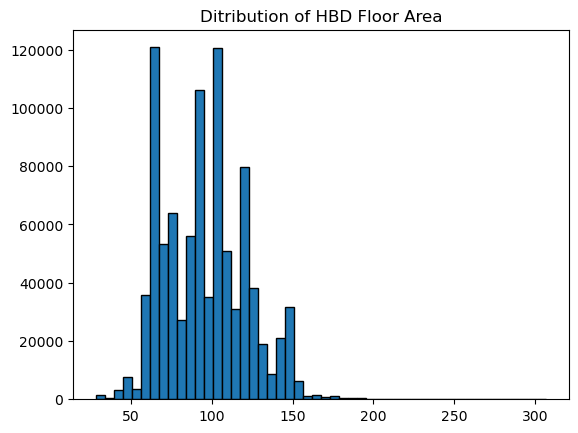

Terrace                 65
Maisonette              16
Executive Maisonette     7
Apartment                4
Adjoined flat            1
Name: flat_model, dtype: int64

In [17]:
plt.hist(prices['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Ditribution of HBD Floor Area')
plt.show()
display(prices[prices['floor_area_sqm'] > 200]['flat_model'].value_counts())

#### Checking distribution of Lease commense year:

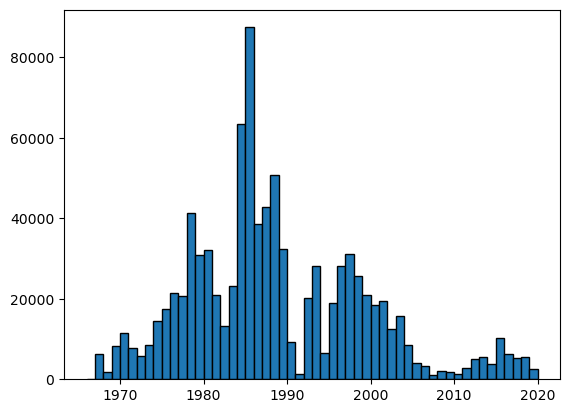

In [18]:
bins = prices['lease_commence_date'].max() - prices['lease_commence_date'].min()
plt.hist(prices['lease_commence_date'], bins = bins, edgecolor='black')
plt.show()

In [19]:
prices.dtypes

town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
current_year             int32
current_month            int32
dtype: object

#### Converting 'remaining_lease' to numbers of year:

In [20]:
def get_lease_year(text):
    if isinstance(text, str):
        yearmonth = [int(x) for x in text.split() if x.isdigit()]
        if len(yearmonth) > 1: #if there's year and month value
            years = yearmonth[0] + yearmonth[1]/12
        else: #if only year
            years = yearmonth[0]
        return years
    else: #if the value is not string
        return text
prices['remaining_lease'] = prices['remaining_lease'].apply(lambda x: get_lease_year(x))
prices

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,current_year,current_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,NaN,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,NaN,1990,1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,NaN,1990,1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,NaN,1990,1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
927460,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,738000.0,92.666667,2024,6
927461,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62.833333,2024,6
927462,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.000000,2024,6
927463,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.666667,2024,6


In [21]:
for i in range(0, len(prices['remaining_lease'])):
    if math.isnan(prices['remaining_lease'].iloc[i]):
        prices['remaining_lease'].iloc[i] = 99 - ((prices['current_year'].iloc[i] + prices['current_month'].iloc[i]/12) - prices['lease_commence_date'].iloc[i])
prices

C:\Users\brigu\AppData\Local\Temp\ipykernel_28188\1170863415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['remaining_lease'].iloc[i] = 99 - ((prices['current_year'].iloc[i] + prices['current_month'].iloc[i]/12) - prices['lease_commence_date'].iloc[i])


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,current_year,current_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,85.916667,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,85.916667,1990,1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,85.916667,1990,1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,85.916667,1990,1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,84.916667,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
927460,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,738000.0,92.666667,2024,6
927461,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62.833333,2024,6
927462,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.000000,2024,6
927463,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.666667,2024,6


In [22]:
prices.isnull().sum()

town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
current_year           0
current_month          0
dtype: int64

### Using MRT(Mass Rapid Transit System) Railway Transportation data 
* Getting MRT coordinates for each city, so that we can calculate the distance afterwards using MRT coordinates

In [23]:
prices['town'].value_counts()

TAMPINES           80005
YISHUN             70097
JURONG WEST        66715
BEDOK              66677
WOODLANDS          65563
ANG MO KIO         52090
HOUGANG            50772
BUKIT BATOK        44429
CHOA CHU KANG      38348
BUKIT MERAH        34383
PASIR RIS          33237
SENGKANG           32488
TOA PAYOH          31541
QUEENSTOWN         28784
GEYLANG            28179
CLEMENTI           28040
BUKIT PANJANG      27708
KALLANG/WHAMPOA    27199
JURONG EAST        24796
SERANGOON          22835
BISHAN             21271
PUNGGOL            20665
SEMBAWANG          13869
MARINE PARADE       8041
CENTRAL AREA        7150
BUKIT TIMAH         2519
LIM CHU KANG          64
Name: town, dtype: int64

In [24]:
list_of_mrt = [
    'Jurong East MRT Station',
    'Bukit Batok MRT Station',
    'Bukit Gombak MRT Station',
    'Choa Chu Kang MRT Station',
    'Yew Tee MRT Station',
    'Kranji MRT Station',
    'Marsiling MRT Station',
    'Woodlands MRT Station',
    'Admiralty MRT Station',
    'Sembawang MRT Station',
    'Canberra MRT Station',
    'Yishun MRT Station',
    'Khatib MRT Station',
    'Yio Chu Kang MRT Station',
    'Ang Mo Kio MRT Station',
    'Bishan MRT Station',
    'Braddell MRT Station',
    'Toa Payoh MRT Station',
    'Novena MRT Station',
    'Newton MRT Station',
    'Orchard MRT Station',
    'Somerset MRT Station',
    'Dhoby Ghaut MRT Station',
    'City Hall MRT Station',
    'Raffles Place MRT Station',
    'Marina Bay MRT Station',
    'Marina South Pier MRT Station',
    'Pasir Ris MRT Station',
    'Tampines MRT Station',
    'Simei MRT Station',
    'Tanah Merah MRT Station',
    'Bedok MRT Station',
    'Kembangan MRT Station',
    'Eunos MRT Station',
    'Paya Lebar MRT Station',
    'Aljunied MRT Station',
    'Kallang MRT Station',
    'Lavender MRT Station',
    'Bugis MRT Station',
    'Tanjong Pagar MRT Station',
    'Outram Park MRT Station',
    'Tiong Bahru MRT Station',
    'Redhill MRT Station',
    'Queenstown MRT Station',
    'Commonwealth MRT Station',
    'Buona Vista MRT Station',
    'Dover MRT Station',
    'Clementi MRT Station',
    'Chinese Garden MRT Station',
    'Lakeside MRT Station',
    'Boon Lay MRT Station',
    'Pioneer MRT Station',
    'Joo Koon MRT Station',
    'Gul Circle MRT Station',
    'Tuas Crescent MRT Station',
    'Tuas West Road MRT Station',
    'Tuas Link MRT Station',
    'Expo MRT Station',
    'Changi Airport MRT Station',
    'HarbourFront MRT Station',
    'Chinatown MRT Station',
    'Clarke Quay MRT Station',
    'Little India MRT Station',
    'Farrer Park MRT Station',
    'Boon Keng MRT Station',
    'Potong Pasir MRT Station',
    'Woodleigh MRT Station',
    'Serangoon MRT Station',
    'Kovan MRT Station',
    'Hougang MRT Station',
    'Buangkok MRT Station',
    'Sengkang MRT Station',
    'Punggol MRT Station',
    'Bras Basah MRT Station',
    'Esplanade MRT Station',
    'Promenade MRT Station',
    'Nicoll Highway MRT Station',
    'Stadium MRT Station',
    'Mountbatten MRT Station',
    'Dakota MRT Station',
    'MacPherson MRT Station',
    'Tai Seng MRT Station',
    'Bartley MRT Station',
    'Lorong Chuan MRT Station',
    'Marymount MRT Station',
    'Caldecott MRT Station',
    'Botanic Gardens MRT Station',
    'Farrer Road MRT Station',
    'Holland Village MRT Station',
    'one-north MRT Station',
    'Kent Ridge MRT Station',
    'Haw Par Villa MRT Station',
    'Pasir Panjang MRT Station',
    'Labrador Park MRT Station',
    'Telok Blangah MRT Station',
    'Bayfront MRT Station',
    'Bukit Panjang MRT Station',
    'Cashew MRT Station',
    'Hillview MRT Station',
    'Beauty World MRT Station',
    'King Albert Park MRT Station',
    'Sixth Avenue MRT Station',
    'Tan Kah Kee MRT Station',
    'Stevens MRT Station',
    'Rochor MRT Station',
    'Downtown MRT Station',
    'Telok Ayer MRT Station',
    'Fort Canning MRT Station',
    'Bencoolen MRT Station',
    'Jalan Besar MRT Station',
    'Bendemeer MRT Station',
    'Geylang Bahru MRT Station',
    'Mattar MRT Station',
    'Ubi MRT Station',
    'Kaki Bukit MRT Station',
    'Bedok North MRT Station',
    'Bedok Reservoir MRT Station',
    'Tampines West MRT Station',
    'Tampines East MRT Station',
    'Upper Changi MRT Station',
    'Woodlands North MRT Station',
    'Woodlands South MRT Station'
]

In [25]:
#Sample Response of request from onemap.gov.sg api 
{
  "found": 1,
  "totalNumPages": 1,
  "pageNum": 1,
  "results": [
    {
      "SEARCHVAL": "640 ROWELL ROAD SINGAPORE 200640",
      "BLK_NO": "640",
      "ROAD_NAME": "ROWELL ROAD",
      "BUILDING": "NIL",
      "ADDRESS": "640 ROWELL ROAD SINGAPORE 200640",
      "POSTAL": "200640",
      "X": "30381.1007417506",
      "Y": "32195.1006872542",
      "LATITUDE": "1.30743547948389",
      "LONGITUDE": "103.854713903431",
      "LONGTITUDE": "103.854713903431"
    }
  ]
}

{'found': 1,
 'totalNumPages': 1,
 'pageNum': 1,
 'results': [{'SEARCHVAL': '640 ROWELL ROAD SINGAPORE 200640',
   'BLK_NO': '640',
   'ROAD_NAME': 'ROWELL ROAD',
   'BUILDING': 'NIL',
   'ADDRESS': '640 ROWELL ROAD SINGAPORE 200640',
   'POSTAL': '200640',
   'X': '30381.1007417506',
   'Y': '32195.1006872542',
   'LATITUDE': '1.30743547948389',
   'LONGITUDE': '103.854713903431',
   'LONGTITUDE': '103.854713903431'}]}

In [26]:
mrt_lat = []
mrt_long = []

for i in range(0, len(list_of_mrt)):
    query_address = list_of_mrt[i]
    query_string = 'https://www.onemap.gov.sg/api/common/elastic/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    resp = requests.get(query_string)
    
    data_mrt = json.loads(resp.content)
    if data_mrt['found'] != 0:
        mrt_lat.append(data_mrt["results"][0]["LATITUDE"])
        mrt_long.append(data_mrt["results"][0]["LONGITUDE"])

        print (str(query_address)+",Lat: "+data_mrt['results'][0]['LATITUDE'] +" Long: "+data_mrt['results'][0]['LONGITUDE'])

    else:
        mrt_lat.append('NotFound')
        mrt_lat.append('NotFound')
        print ("No Results")

Jurong East MRT Station,Lat: 1.33329506563598 Long: 103.742153884191
Bukit Batok MRT Station,Lat: 1.34903331201636 Long: 103.749566478309
Bukit Gombak MRT Station,Lat: 1.35861159094192 Long: 103.751790910733
Choa Chu Kang MRT Station,Lat: 1.38536316540225 Long: 103.744370779756
Yew Tee MRT Station,Lat: 1.39729771118639 Long: 103.74735767326
Kranji MRT Station,Lat: 1.4250690629411 Long: 103.762099449562
Marsiling MRT Station,Lat: 1.43262603485889 Long: 103.774051197031
Woodlands MRT Station,Lat: 1.43681962961519 Long: 103.786066799253
Admiralty MRT Station,Lat: 1.44058856161847 Long: 103.800990519771
Sembawang MRT Station,Lat: 1.44902668521092 Long: 103.820139486468
Canberra MRT Station,Lat: 1.44307664075699 Long: 103.829702590959
Yishun MRT Station,Lat: 1.42952522867762 Long: 103.834995141847
Khatib MRT Station,Lat: 1.41758906054002 Long: 103.833061043125
Yio Chu Kang MRT Station,Lat: 1.38149882492597 Long: 103.845170704861
Ang Mo Kio MRT Station,Lat: 1.36993284962264 Long: 103.8495580

In [27]:
mrt_location = pd.DataFrame({
    'MRT': list_of_mrt,
    'Latitude': mrt_lat,
    'Longitude': mrt_long
})
mrt_location

,MRT,Latitude,Longitude
0,Jurong East MRT Station,1.33329506563598,103.742153884191
1,Bukit Batok MRT Station,1.34903331201636,103.749566478309
2,Bukit Gombak MRT Station,1.35861159094192,103.751790910733
3,Choa Chu Kang MRT Station,1.38536316540225,103.744370779756
4,Yew Tee MRT Station,1.39729771118639,103.74735767326
...,...,...,...
117,Tampines West MRT Station,1.3456336579777,103.938492495285
118,Tampines East MRT Station,1.35619148271544,103.9546344625
119,Upper Changi MRT Station,1.34173977444995,103.961472788634
120,Woodlands North MRT Station,1.44829245259621,103.785692682441


#### Getting Coordinates of each HBD(Housing and Development Board) Resale flats in order to conduct the distance from MRT stations as well as So, that we can take out the distance of flats from MRT stations and, also from CBD(Central Business District)

In [28]:
prices['address'] = prices['block']+' '+prices['street_name']
prices

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,current_year,current_month,address
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,85.916667,1990,1,309 ANG MO KIO AVE 1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,85.916667,1990,1,309 ANG MO KIO AVE 1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,85.916667,1990,1,309 ANG MO KIO AVE 1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,85.916667,1990,1,309 ANG MO KIO AVE 1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,84.916667,1990,1,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
927460,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,738000.0,92.666667,2024,6,502B YISHUN ST 51
927461,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62.833333,2024,6,865 YISHUN ST 81
927462,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.000000,2024,6,723 YISHUN ST 71
927463,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.666667,2024,6,826 YISHUN ST 81


In [29]:
address_list = prices['address']
address_list

0         309 ANG MO KIO AVE 1
1         309 ANG MO KIO AVE 1
2         309 ANG MO KIO AVE 1
3         309 ANG MO KIO AVE 1
4         216 ANG MO KIO AVE 1
                  ...         
927460       502B YISHUN ST 51
927461        865 YISHUN ST 81
927462        723 YISHUN ST 71
927463        826 YISHUN ST 81
927464        826 YISHUN ST 81
Name: address, Length: 927465, dtype: object

In [30]:
#Sample Response of request from onemap.gov.sg api 
{
  "found": 1,
  "totalNumPages": 1,
  "pageNum": 1,
  "results": [
    {
      "SEARCHVAL": "640 ROWELL ROAD SINGAPORE 200640",
      "BLK_NO": "640",
      "ROAD_NAME": "ROWELL ROAD",
      "BUILDING": "NIL",
      "ADDRESS": "640 ROWELL ROAD SINGAPORE 200640",
      "POSTAL": "200640",
      "X": "30381.1007417506",
      "Y": "32195.1006872542",
      "LATITUDE": "1.30743547948389",
      "LONGITUDE": "103.854713903431",
      "LONGTITUDE": "103.854713903431"
    }
  ]
}

{'found': 1,
 'totalNumPages': 1,
 'pageNum': 1,
 'results': [{'SEARCHVAL': '640 ROWELL ROAD SINGAPORE 200640',
   'BLK_NO': '640',
   'ROAD_NAME': 'ROWELL ROAD',
   'BUILDING': 'NIL',
   'ADDRESS': '640 ROWELL ROAD SINGAPORE 200640',
   'POSTAL': '200640',
   'X': '30381.1007417506',
   'Y': '32195.1006872542',
   'LATITUDE': '1.30743547948389',
   'LONGITUDE': '103.854713903431',
   'LONGTITUDE': '103.854713903431'}]}

In [32]:
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []
count = 0

for row in range(len(address_list)):
    query_address = address_list[row]
    query_string = 'https://www.onemap.gov.sg/api/common/elastic/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y&pageNum=1'
    resp = requests.get(query_string)


    data_geo_location=json.loads(resp.content)
    if data_geo_location['found'] != 0:
        latitude.append(data_geo_location['results'][0]['LATITUDE'])
        longitude.append(data_geo_location['results'][0]['LONGITUDE'])
        blk_no.append(data_geo_location['results'][0]['BLK_NO'])
        road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
        postal_code.append(data_geo_location['results'][0]['POSTAL'])
        address.append(query_address)
        print (str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] + " Long: " + data_geo_location['results'][0]['LONGITUDE'])
    else:
        print ("No Results")

No Results
No Results
No Results
No Results
216 ANG MO KIO AVE 1 ,Lat: 1.36619678831054 Long: 103.841505011903
211 ANG MO KIO AVE 3 ,Lat: 1.369196965617 Long: 103.841666636086
202 ANG MO KIO AVE 3 ,Lat: 1.36844644010937 Long: 103.844516260527
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
232 ANG MO KIO AVE 3 ,Lat: 1.36834606813391 Long: 103.837196046409
232 ANG MO KIO AVE 3 ,Lat: 1.36834606813391 Long: 103.837196046409
308 ANG MO KIO AVE 1 ,Lat: 1.36569665029696 Long: 103.844347269095
308 ANG MO KIO AVE 1 ,Lat: 1.36569665029696 Long: 103.844347269095
220 ANG MO KIO AVE 1 ,Lat: 1.36558833593063 Long: 103.840518883254
219 ANG MO KIO AVE 1 ,Lat: 1.36598198004505 Long: 103.840654039612
No Results
320 ANG MO KIO AVE 1 ,Lat: 1.36559244608528 Long: 103.848386744168
No Results
223 ANG MO KIO AVE 1 ,Lat: 1.36604808445916 Long: 103.838122716883
223 ANG MO KIO AVE 1 ,Lat: 1.36604808445916 Long: 103.838122716883


638 ANG MO KIO AVE 6 ,Lat: 1.38047559647224 Long: 103.843567764408
513 ANG MO KIO AVE 8 ,Lat: 1.37273696913231 Long: 103.850194854525
646 ANG MO KIO AVE 6 ,Lat: 1.37939517687868 Long: 103.843763599411
150 ANG MO KIO AVE 5 ,Lat: 1.37680678506745 Long: 103.842017962576
179 ANG MO KIO AVE 5 ,Lat: 1.37690418077298 Long: 103.836218103538
179 ANG MO KIO AVE 5 ,Lat: 1.37690418077298 Long: 103.836218103538
336 ANG MO KIO AVE 1 ,Lat: 1.3635938468353 Long: 103.851784409615
335 ANG MO KIO AVE 1 ,Lat: 1.36320996798464 Long: 103.850690597254
401 ANG MO KIO AVE 10 ,Lat: 1.36101765642805 Long: 103.855387562453
439 ANG MO KIO AVE 10 ,Lat: 1.36629197864802 Long: 103.85349630883
430 ANG MO KIO AVE 3 ,Lat: 1.36899287777802 Long: 103.85276134968
460 ANG MO KIO AVE 10 ,Lat: 1.36633947709831 Long: 103.859122319513
459 ANG MO KIO AVE 10 ,Lat: 1.36701964480661 Long: 103.859377190201
716 ANG MO KIO AVE 6 ,Lat: 1.37147783065153 Long: 103.845868750998
545 ANG MO KIO AVE 10 ,Lat: 1.37317921904936 Long: 103.856294

724 BEDOK RESERVOIR RD ,Lat: 1.33714403979137 Long: 103.928433830286
166 BEDOK STH AVE 3 ,Lat: 1.32004079860245 Long: 103.945196685812
22 BEDOK STH AVE 1 ,Lat: 1.3228317365472 Long: 103.932852166088
71 BEDOK STH RD ,Lat: 1.32041601736618 Long: 103.942732310081
82 BEDOK NTH RD ,Lat: 1.32953680475668 Long: 103.940406562732
78 BEDOK NTH RD ,Lat: 1.32726007220341 Long: 103.940848770214
79 BEDOK NTH RD ,Lat: 1.32769194470055 Long: 103.940763685492
79 BEDOK NTH RD ,Lat: 1.32769194470055 Long: 103.940763685492
80 BEDOK NTH RD ,Lat: 1.32848132017235 Long: 103.940611608837
134 BEDOK NTH ST 2 ,Lat: 1.32832133313255 Long: 103.93658216345
128 BEDOK NTH ST 2 ,Lat: 1.327740236451 Long: 103.939005696963
126 BEDOK NTH ST 2 ,Lat: 1.3281683000397 Long: 103.938917890645
130 BEDOK NTH ST 2 ,Lat: 1.32716150771949 Long: 103.936824833587
130 BEDOK NTH ST 2 ,Lat: 1.32716150771949 Long: 103.936824833587
132 BEDOK NTH ST 2 ,Lat: 1.32775288998395 Long: 103.936709340476
131 BEDOK NTH AVE 3 ,Lat: 1.3269699402053 L

216 BT BATOK ST 21 ,Lat: 1.3471050066434 Long: 103.753638622774
216 BT BATOK ST 21 ,Lat: 1.3471050066434 Long: 103.753638622774
115 BT BATOK WEST AVE 6 ,Lat: 1.34918319745272 Long: 103.746566795213
115 BT BATOK WEST AVE 6 ,Lat: 1.34918319745272 Long: 103.746566795213
117 BT BATOK WEST AVE 6 ,Lat: 1.34996555858187 Long: 103.74714214948
111 BT BATOK WEST AVE 6 ,Lat: 1.34840644346954 Long: 103.745994934101
103 BT BATOK CTRL ,Lat: 1.34822368204242 Long: 103.748034526478
103 BT BATOK CTRL ,Lat: 1.34822368204242 Long: 103.748034526478
223 BT BATOK EAST AVE 3 ,Lat: 1.34801554533173 Long: 103.753397257075
223 BT BATOK EAST AVE 3 ,Lat: 1.34801554533173 Long: 103.753397257075
221 BT BATOK EAST AVE 3 ,Lat: 1.34747562371947 Long: 103.753690953671
221 BT BATOK EAST AVE 3 ,Lat: 1.34747562371947 Long: 103.753690953671
214 BT BATOK ST 21 ,Lat: 1.34729998285678 Long: 103.75289444646
120 BT BATOK CTRL ,Lat: 1.3510594273469 Long: 103.747712277505
121 BT BATOK CTRL ,Lat: 1.35162557081969 Long: 103.7480113

639 ROWELL RD ,Lat: 1.30775082189872 Long: 103.855203622089
632 VEERASAMY RD ,Lat: 1.30606601392047 Long: 103.854501603493
633 VEERASAMY RD ,Lat: 1.30570669675965 Long: 103.854943251549
642 ROWELL RD ,Lat: 1.30778051437061 Long: 103.856495249944
1 TECK WHYE AVE ,Lat: 1.38253882861956 Long: 103.751710905678
4 TECK WHYE AVE ,Lat: 1.38193929484651 Long: 103.752806721707
4 TECK WHYE AVE ,Lat: 1.38193929484651 Long: 103.752806721707
10 TECK WHYE AVE ,Lat: 1.38047054647235 Long: 103.755211077169
10 TECK WHYE AVE ,Lat: 1.38047054647235 Long: 103.755211077169
16 TECK WHYE LANE ,Lat: 1.37842710387364 Long: 103.754911815576
26 TECK WHYE LANE ,Lat: 1.37762112372223 Long: 103.755740001262
13 TECK WHYE LANE ,Lat: 1.37894634652916 Long: 103.755847939018
440 CLEMENTI AVE 3 ,Lat: 1.31623186133299 Long: 103.763939019821
509 WEST COAST DR ,Lat: 1.31115776641946 Long: 103.761017540932
363 CLEMENTI AVE 2 ,Lat: 1.31282068300245 Long: 103.768916982632
365 CLEMENTI AVE 2 ,Lat: 1.3122997890586 Long: 103.76994

34 CIRCUIT RD ,Lat: 1.32904361761824 Long: 103.887438053241
34 CIRCUIT RD ,Lat: 1.32904361761824 Long: 103.887438053241
23 BALAM RD ,Lat: 1.33097096666446 Long: 103.886540431592
21 BALAM RD ,Lat: 1.33119721401346 Long: 103.886976681713
81 MACPHERSON LANE ,Lat: 1.33216938209876 Long: 103.886296676732
93 JLN DUA ,Lat: 1.30868190843585 Long: 103.887123739313
61 CIRCUIT RD ,Lat: 1.32573742833728 Long: 103.887054329523
67 CIRCUIT RD ,Lat: 1.32584857614009 Long: 103.887926514332
57 CIRCUIT RD ,Lat: 1.32472311721669 Long: 103.886685702383
58 CIRCUIT RD ,Lat: 1.32501466214245 Long: 103.886455988464
58 CIRCUIT RD ,Lat: 1.32501466214245 Long: 103.886455988464
47 CIRCUIT RD ,Lat: 1.32577527145564 Long: 103.885703636114
47 CIRCUIT RD ,Lat: 1.32577527145564 Long: 103.885703636114
48 CIRCUIT RD ,Lat: 1.32541032458901 Long: 103.88565098487
49 CIRCUIT RD ,Lat: 1.32513240286821 Long: 103.885610754075
49 CIRCUIT RD ,Lat: 1.32513240286821 Long: 103.885610754075
40 CIRCUIT RD ,Lat: 1.32767695905654 Long: 

214 JURONG EAST ST 21 ,Lat: 1.33928625957387 Long: 103.738985189412
208 JURONG EAST ST 21 ,Lat: 1.33843639958331 Long: 103.742666850845
211 JURONG EAST ST 21 ,Lat: 1.33866911059386 Long: 103.740292528065
307 JURONG EAST ST 32 ,Lat: 1.34652151786552 Long: 103.734843138868
319 JURONG EAST ST 31 ,Lat: 1.34798942321199 Long: 103.7304582035
316 JURONG EAST ST 32 ,Lat: 1.34600652715087 Long: 103.732079814028
316 JURONG EAST ST 32 ,Lat: 1.34600652715087 Long: 103.732079814028
316 JURONG EAST ST 32 ,Lat: 1.34600652715087 Long: 103.732079814028
232 JURONG EAST ST 21 ,Lat: 1.33982600141552 Long: 103.740822151959
251 JURONG EAST ST 24 ,Lat: 1.34316585637535 Long: 103.73967649195
251 JURONG EAST ST 24 ,Lat: 1.34316585637535 Long: 103.73967649195
408 PANDAN GDNS ,Lat: 1.31820397685545 Long: 103.74881622665
218 JURONG EAST ST 21 ,Lat: 1.34033241177285 Long: 103.737928007136
322 JURONG EAST ST 31 ,Lat: 1.34803793215272 Long: 103.729165542694
227 JURONG EAST ST 21 ,Lat: 1.34182066937117 Long: 103.7360

554 JURONG WEST ST 42 ,Lat: 1.35323480092319 Long: 103.71786608982
433 JURONG WEST ST 42 ,Lat: 1.3527798445309 Long: 103.722858578257
442 JURONG WEST AVE 1 ,Lat: 1.35151847519437 Long: 103.719496480131
450 JURONG WEST ST 42 ,Lat: 1.35163889174202 Long: 103.717524141693
450 JURONG WEST ST 42 ,Lat: 1.35163889174202 Long: 103.717524141693
455 JURONG WEST ST 42 ,Lat: 1.35106550496497 Long: 103.718527803659
455 JURONG WEST ST 42 ,Lat: 1.35106550496497 Long: 103.718527803659
402 JURONG WEST ST 42 ,Lat: 1.35339365971468 Long: 103.722445654654
485 JURONG WEST AVE 1 ,Lat: 1.3483471084985 Long: 103.727243025871
431 JURONG WEST AVE 1 ,Lat: 1.35230306526458 Long: 103.72463219774
543 JURONG WEST ST 42 ,Lat: 1.35186325238554 Long: 103.715798646003
545 JURONG WEST ST 42 ,Lat: 1.35229053905004 Long: 103.715246438458
550 JURONG WEST ST 42 ,Lat: 1.35280491257393 Long: 103.716740537175
550 JURONG WEST ST 42 ,Lat: 1.35280491257393 Long: 103.716740537175
551 JURONG WEST ST 42 ,Lat: 1.35237770099493 Long: 1

66 C'WEALTH DR ,Lat: 1.29911685240757 Long: 103.796583831778
No Results
No Results
No Results
111 C'WEALTH CRES ,Lat: 1.30635203323967 Long: 103.79846623315
55 C'WEALTH DR ,Lat: 1.29705265098724 Long: 103.797078117356
43 TANGLIN HALT RD ,Lat: 1.29871092283081 Long: 103.798579967767
38 TANGLIN HALT RD ,Lat: 1.29750810337269 Long: 103.798722843014
33 TANGLIN HALT RD ,Lat: 1.29656744545058 Long: 103.798378639997
36 TANGLIN HALT RD ,Lat: 1.2972924543604 Long: 103.79822869754
26 TANGLIN HALT RD ,Lat: 1.29810641144417 Long: 103.799781003593
31 TANGLIN HALT RD ,Lat: 1.29936191629581 Long: 103.799471412664
58 C'WEALTH DR ,Lat: 1.29776969323291 Long: 103.797090140513
2 DOVER RD ,Lat: 1.30310343884227 Long: 103.782905027596
3 DOVER RD ,Lat: 1.30373592079542 Long: 103.782443789544
No Results
6 GHIM MOH RD ,Lat: 1.31228409003273 Long: 103.78840388918
6 GHIM MOH RD ,Lat: 1.31228409003273 Long: 103.78840388918
5 GHIM MOH RD ,Lat: 1.31269310627626 Long: 103.788308828224
5 GHIM MOH RD ,Lat: 1.31269310

213 SERANGOON AVE 4 ,Lat: 1.35717269116489 Long: 103.873093293448
119 SERANGOON NTH AVE 1 ,Lat: 1.36748142862257 Long: 103.871491752337
316 SERANGOON AVE 2 ,Lat: 1.35301133658634 Long: 103.86647177389
102 TAMPINES ST 11 ,Lat: 1.34671616267656 Long: 103.945521388285
113 TAMPINES ST 11 ,Lat: 1.34647851722058 Long: 103.946176771298
112 TAMPINES ST 11 ,Lat: 1.34629813577257 Long: 103.947509805595
209 TAMPINES ST 21 ,Lat: 1.35191743647505 Long: 103.952832223103
267 TAMPINES ST 21 ,Lat: 1.35077278806368 Long: 103.9492592317
269 TAMPINES ST 21 ,Lat: 1.35074543601676 Long: 103.948024392634
269 TAMPINES ST 21 ,Lat: 1.35074543601676 Long: 103.948024392634
269 TAMPINES ST 21 ,Lat: 1.35074543601676 Long: 103.948024392634
202 TAMPINES ST 21 ,Lat: 1.35290528862856 Long: 103.952539174975
202 TAMPINES ST 21 ,Lat: 1.35290528862856 Long: 103.952539174975
138 TAMPINES ST 11 ,Lat: 1.3455045062724 Long: 103.945588355383
924 TAMPINES ST 91 ,Lat: 1.34679100571296 Long: 103.940776965834
925 TAMPINES ST 91 ,La

232 LOR 8 TOA PAYOH ,Lat: 1.3375718690811 Long: 103.858843935428
115 LOR 1 TOA PAYOH ,Lat: 1.34063140668544 Long: 103.844305221987
114 LOR 1 TOA PAYOH ,Lat: 1.34094034792461 Long: 103.844305919348
113 LOR 1 TOA PAYOH ,Lat: 1.34128334016832 Long: 103.844605484696
53 LOR 5 TOA PAYOH ,Lat: 1.33780452154069 Long: 103.85079328117
100 LOR 1 TOA PAYOH ,Lat: 1.33956400517882 Long: 103.848585713817
100 LOR 1 TOA PAYOH ,Lat: 1.33956400517882 Long: 103.848585713817
100 LOR 1 TOA PAYOH ,Lat: 1.33956400517882 Long: 103.848585713817
98 LOR 1 TOA PAYOH ,Lat: 1.33917577957921 Long: 103.848380074395
91 LOR 3 TOA PAYOH ,Lat: 1.33822603074183 Long: 103.848596916655
2 LOR 7 TOA PAYOH ,Lat: 1.33860752552334 Long: 103.853515565238
1 LOR 7 TOA PAYOH ,Lat: 1.33943033543358 Long: 103.853442790992
1 LOR 7 TOA PAYOH ,Lat: 1.33943033543358 Long: 103.853442790992
1 LOR 7 TOA PAYOH ,Lat: 1.33943033543358 Long: 103.853442790992
No Results
126 LOR 1 TOA PAYOH ,Lat: 1.33781465652998 Long: 103.84513085219
128 LOR 1 TOA

143 YISHUN RING RD ,Lat: 1.43100259364042 Long: 103.831093779909
137 YISHUN RING RD ,Lat: 1.43198319567796 Long: 103.830253382367
137 YISHUN RING RD ,Lat: 1.43198319567796 Long: 103.830253382367
128 YISHUN ST 11 ,Lat: 1.43387793728634 Long: 103.831302218611
254 YISHUN RING RD ,Lat: 1.43461891745071 Long: 103.840583866502
262 YISHUN ST 22 ,Lat: 1.4357801119708 Long: 103.83917092486
276 YISHUN ST 22 ,Lat: 1.43782287576482 Long: 103.837838021643
751 YISHUN ST 72 ,Lat: 1.42761188817552 Long: 103.834268383036
751 YISHUN ST 72 ,Lat: 1.42761188817552 Long: 103.834268383036
752 YISHUN ST 72 ,Lat: 1.42723761189081 Long: 103.834050197556
733 YISHUN AVE 5 ,Lat: 1.42965421082047 Long: 103.830889934491
742 YISHUN AVE 5 ,Lat: 1.42972006809811 Long: 103.83310944896
740 YISHUN AVE 5 ,Lat: 1.43012361713357 Long: 103.832153164362
210 YISHUN ST 21 ,Lat: 1.43131678141962 Long: 103.838865952817
205 YISHUN ST 21 ,Lat: 1.43106560031808 Long: 103.836307087652
219 YISHUN ST 21 ,Lat: 1.43331614582593 Long: 103.

725 ANG MO KIO AVE 6 ,Lat: 1.37279081671095 Long: 103.846911241497
501 ANG MO KIO AVE 5 ,Lat: 1.37598486077444 Long: 103.848860479053
642 ANG MO KIO AVE 5 ,Lat: 1.37794352430397 Long: 103.840479239853
642 ANG MO KIO AVE 5 ,Lat: 1.37794352430397 Long: 103.840479239853
648 ANG MO KIO AVE 5 ,Lat: 1.37823859353841 Long: 103.843719728887
622 ANG MO KIO AVE 9 ,Lat: 1.382064341745 Long: 103.839741864292
171 ANG MO KIO AVE 4 ,Lat: 1.37473291237038 Long: 103.835682669212
534 BEDOK NTH ST 3 ,Lat: 1.33303698213001 Long: 103.924812248346
535 BEDOK NTH ST 3 ,Lat: 1.33270278688381 Long: 103.923456730636
28 NEW UPP CHANGI RD ,Lat: 1.32369451969703 Long: 103.934994919422
29 NEW UPP CHANGI RD ,Lat: 1.32395813360222 Long: 103.936341250384
29 NEW UPP CHANGI RD ,Lat: 1.32395813360222 Long: 103.936341250384
29 NEW UPP CHANGI RD ,Lat: 1.32395813360222 Long: 103.936341250384
27 NEW UPP CHANGI RD ,Lat: 1.32412432931246 Long: 103.934921045772
76 BEDOK NTH RD ,Lat: 1.3282966654865 Long: 103.942067527916
502 BED

127 BT BATOK WEST AVE 6 ,Lat: 1.35185612872026 Long: 103.746076774467
No Results
No Results
146 BT BATOK WEST AVE 6 ,Lat: 1.34966890869827 Long: 103.744083499088
139 BT BATOK WEST AVE 6 ,Lat: 1.35110319953225 Long: 103.744169896472
135 BT BATOK WEST AVE 6 ,Lat: 1.35125231918218 Long: 103.744795017835
136 BT BATOK WEST AVE 6 ,Lat: 1.35090042870513 Long: 103.74485764967
145 BT BATOK ST 11 ,Lat: 1.34997305498668 Long: 103.743724852615
145 BT BATOK ST 11 ,Lat: 1.34997305498668 Long: 103.743724852615
180 BT BATOK WEST AVE 8 ,Lat: 1.34555792527722 Long: 103.742841014483
175 BT BATOK WEST AVE 8 ,Lat: 1.34554897953938 Long: 103.741598629749
213 BT BATOK ST 21 ,Lat: 1.34681845451426 Long: 103.752496875347
215 BT BATOK ST 21 ,Lat: 1.34677496983575 Long: 103.753335935038
239 BT BATOK EAST AVE 5 ,Lat: 1.3502391390638 Long: 103.755100850762
239 BT BATOK EAST AVE 5 ,Lat: 1.3502391390638 Long: 103.755100850762
240 BT BATOK EAST AVE 5 ,Lat: 1.35048816023777 Long: 103.754177773165
242 BT BATOK EAST AVE

345 CLEMENTI AVE 5 ,Lat: 1.31770281154049 Long: 103.769076731999
518 WEST COAST RD ,Lat: 1.30821759885498 Long: 103.758943172302
603 CLEMENTI WEST ST 1 ,Lat: 1.3047886514707 Long: 103.767329303088
608 CLEMENTI WEST ST 1 ,Lat: 1.30434110257324 Long: 103.766529796163
608 CLEMENTI WEST ST 1 ,Lat: 1.30434110257324 Long: 103.766529796163
701 WEST COAST RD ,Lat: 1.30761194155051 Long: 103.761376368247
703 WEST COAST RD ,Lat: 1.30674896245195 Long: 103.760633580535
449 CLEMENTI AVE 3 ,Lat: 1.31361567894894 Long: 103.764809966953
731 CLEMENTI WEST ST 2 ,Lat: 1.30440046544571 Long: 103.762746222568
728 CLEMENTI WEST ST 2 ,Lat: 1.30520206759029 Long: 103.763833368922
729 CLEMENTI WEST ST 2 ,Lat: 1.30492724290307 Long: 103.763519401903
706 CLEMENTI WEST ST 2 ,Lat: 1.30676076028652 Long: 103.762363136976
379 CLEMENTI AVE 5 ,Lat: 1.31797801720797 Long: 103.767831518404
371 CLEMENTI AVE 4 ,Lat: 1.32057465713359 Long: 103.768211873157
113 CLEMENTI ST 13 ,Lat: 1.32368401078529 Long: 103.77013234931
11

227 JURONG EAST ST 21 ,Lat: 1.34182066937117 Long: 103.736087793751
212 JURONG EAST ST 21 ,Lat: 1.33909401436064 Long: 103.740391980229
312 JURONG EAST ST 32 ,Lat: 1.34691464537256 Long: 103.732174273854
413 PANDAN GDNS ,Lat: 1.31951010175214 Long: 103.747947223669
413 PANDAN GDNS ,Lat: 1.31951010175214 Long: 103.747947223669
406 PANDAN GDNS ,Lat: 1.318821472571 Long: 103.74922637213
323 JURONG EAST ST 31 ,Lat: 1.34839013731603 Long: 103.728986352199
46 TEBAN GDNS RD ,Lat: 1.32003028137399 Long: 103.74047874277
No Results
No Results
No Results
113 TAO CHING RD ,Lat: 1.33318449829266 Long: 103.724354324887
119 HO CHING RD ,Lat: 1.33529905914454 Long: 103.724712974749
119 HO CHING RD ,Lat: 1.33529905914454 Long: 103.724712974749
120 HO CHING RD ,Lat: 1.33540764836183 Long: 103.724260953568
120 HO CHING RD ,Lat: 1.33540764836183 Long: 103.724260953568
No Results
No Results
No Results
No Results
185 BOON LAY AVE ,Lat: 1.34640538174578 Long: 103.71077711286
185 BOON LAY AVE ,Lat: 1.34640538

32 MARINE CRES ,Lat: 1.303178277126 Long: 103.911806642809
30 MARINE CRES ,Lat: 1.30422279476766 Long: 103.911164021354
57 MARINE TER ,Lat: 1.30624749596698 Long: 103.915275474904
8 MARINE TER ,Lat: 1.30436465592228 Long: 103.916108628733
7 MARINE TER ,Lat: 1.30409794254107 Long: 103.917275409766
7 MARINE TER ,Lat: 1.30409794254107 Long: 103.917275409766
45 MARINE CRES ,Lat: 1.30455023575131 Long: 103.912455527874
60 MARINE DR ,Lat: 1.30338982213302 Long: 103.908553539684
60 MARINE DR ,Lat: 1.30338982213302 Long: 103.908553539684
63 MARINE DR ,Lat: 1.3023807015581 Long: 103.909238899358
18 MARINE TER ,Lat: 1.30320858339073 Long: 103.914300755467
44 MARINE CRES ,Lat: 1.30473348573354 Long: 103.913087962182
72 MARINE DR ,Lat: 1.30428356986834 Long: 103.908364873073
72 MARINE DR ,Lat: 1.30428356986834 Long: 103.908364873073
2 MARINE TER ,Lat: 1.3044676150311 Long: 103.918174087572
60 C'WEALTH DR ,Lat: 1.29825219188502 Long: 103.797090121677
84 C'WEALTH CL ,Lat: 1.30363604634114 Long: 103.

813 TAMPINES ST 81 ,Lat: 1.34695081847394 Long: 103.936416159541
814 TAMPINES ST 81 ,Lat: 1.34728360419145 Long: 103.936553864724
810 TAMPINES AVE 4 ,Lat: 1.34645463315474 Long: 103.936611366113
109 TAMPINES ST 11 ,Lat: 1.34740780737329 Long: 103.948811827647
265 TAMPINES ST 21 ,Lat: 1.35245349194636 Long: 103.950238896388
281 TAMPINES ST 22 ,Lat: 1.34717701419788 Long: 103.952587239176
273 TAMPINES ST 22 ,Lat: 1.34868716059761 Long: 103.950450298399
273 TAMPINES ST 22 ,Lat: 1.34868716059761 Long: 103.950450298399
293 TAMPINES ST 22 ,Lat: 1.35039108059223 Long: 103.954901592901
244 TAMPINES ST 21 ,Lat: 1.35380840642139 Long: 103.947114964145
240 TAMPINES ST 21 ,Lat: 1.35500406974434 Long: 103.947121420342
913 TAMPINES ST 91 ,Lat: 1.34886928075247 Long: 103.938985222573
916 TAMPINES ST 91 ,Lat: 1.34863107372522 Long: 103.940290409375
916 TAMPINES ST 91 ,Lat: 1.34863107372522 Long: 103.940290409375
902 TAMPINES AVE 4 ,Lat: 1.35128036439795 Long: 103.939195191948
253 TAMPINES ST 21 ,Lat: 

742 YISHUN AVE 5 ,Lat: 1.42972006809811 Long: 103.83310944896
741 YISHUN AVE 5 ,Lat: 1.43010019275338 Long: 103.833117595994
741 YISHUN AVE 5 ,Lat: 1.43010019275338 Long: 103.833117595994
741 YISHUN AVE 5 ,Lat: 1.43010019275338 Long: 103.833117595994
138 YISHUN RING RD ,Lat: 1.43160991206918 Long: 103.830614068732
134 YISHUN ST 11 ,Lat: 1.43237650538302 Long: 103.831410877391
211 YISHUN ST 21 ,Lat: 1.4317457809835 Long: 103.838295593199
203 YISHUN ST 21 ,Lat: 1.43068689542817 Long: 103.83657443377
141 YISHUN RING RD ,Lat: 1.43089700238255 Long: 103.830000816371
141 YISHUN RING RD ,Lat: 1.43089700238255 Long: 103.830000816371
151 YISHUN ST 11 ,Lat: 1.4308063369681 Long: 103.83426814362
220 YISHUN ST 21 ,Lat: 1.43361671593167 Long: 103.835244034191
279 YISHUN ST 22 ,Lat: 1.43837258876623 Long: 103.837384298272
756 YISHUN ST 72 ,Lat: 1.42656876558013 Long: 103.833243240371
390 YISHUN AVE 6 ,Lat: 1.42921279276692 Long: 103.848403863548
752 YISHUN ST 72 ,Lat: 1.42723761189081 Long: 103.8340

412 ANG MO KIO AVE 10 ,Lat: 1.36385512178453 Long: 103.855287998999
412 ANG MO KIO AVE 10 ,Lat: 1.36385512178453 Long: 103.855287998999
415 ANG MO KIO AVE 10 ,Lat: 1.36445335577543 Long: 103.853655233672
417 ANG MO KIO AVE 10 ,Lat: 1.36495953274783 Long: 103.855197097728
440 ANG MO KIO AVE 10 ,Lat: 1.36642789831215 Long: 103.854311491141
425 ANG MO KIO AVE 3 ,Lat: 1.36912241721255 Long: 103.851616057064
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
572 ANG MO KIO AVE 3 ,Lat: 1.37025836061034 Long: 103.855969042929
465 ANG MO KIO AVE 10 ,Lat: 1.3662010408294 Long: 103.857200967235
563 ANG MO KIO AVE 3 ,Lat: 1.36987214145166 Long: 103.858003534994
563 ANG MO KIO AVE 3 ,Lat: 1.36987214145166 Long: 103.858003534994
564 ANG MO KIO AVE 3 ,Lat: 1.36984837555524 Long: 103.859404131956
612 ANG MO KIO AVE 4 ,Lat: 1.37890791374409 Long: 103.838602654716
612 ANG MO KIO AVE 4 ,Lat: 1.37890791374409 Long: 103.838602654716
607 ANG MO KIO AVE 4 ,Lat: 1.38046758670091 Long: 103.8388

605 BEDOK RESERVOIR RD ,Lat: 1.33023693207314 Long: 103.913508109392
62 CHAI CHEE RD ,Lat: 1.32541587745253 Long: 103.921251264514
718 BEDOK RESERVOIR RD ,Lat: 1.3366305993765 Long: 103.92574851611
54 NEW UPP CHANGI RD ,Lat: 1.32486087785589 Long: 103.942554038061
32 BEDOK STH AVE 2 ,Lat: 1.32262578075749 Long: 103.937815786523
91 BEDOK NTH ST 4 ,Lat: 1.33254881363421 Long: 103.940369649715
90 BEDOK NTH ST 4 ,Lat: 1.33214927189672 Long: 103.940449941907
111 BEDOK NTH RD ,Lat: 1.33145574028188 Long: 103.935458644142
97 BEDOK NTH AVE 4 ,Lat: 1.33296577436017 Long: 103.939962571035
98 BEDOK NTH AVE 4 ,Lat: 1.3342332740943 Long: 103.93984305789
139 BEDOK NTH AVE 3 ,Lat: 1.32941001130625 Long: 103.935397269548
139 BEDOK NTH AVE 3 ,Lat: 1.32941001130625 Long: 103.935397269548
33 CHAI CHEE AVE ,Lat: 1.32400911794369 Long: 103.925848135552
34 CHAI CHEE AVE ,Lat: 1.32416996959775 Long: 103.926405179845
725 BEDOK RESERVOIR RD ,Lat: 1.33764586553964 Long: 103.928990816937
22 SIN MING RD ,Lat: 1.3

4 JLN BT HO SWEE ,Lat: 1.28742239926051 Long: 103.831238878232
18 TIONG BAHRU RD ,Lat: 1.28572778130037 Long: 103.832592401388
40 TELOK BLANGAH RISE ,Lat: 1.27209926567831 Long: 103.823245112725
120 BT MERAH VIEW ,Lat: 1.28277443239482 Long: 103.822612454246
No Results
106 HENDERSON CRES ,Lat: 1.28942607947152 Long: 103.822276781927
114 BT PURMEI RD ,Lat: 1.27507181850164 Long: 103.825887190072
115 BT PURMEI RD ,Lat: 1.27535201369639 Long: 103.826950180582
57 TELOK BLANGAH HTS ,Lat: 1.27463331496043 Long: 103.812586604999
61 TELOK BLANGAH HTS ,Lat: 1.27570500784019 Long: 103.812007084346
51 TELOK BLANGAH DR ,Lat: 1.27351337938811 Long: 103.810145340012
51 TELOK BLANGAH DR ,Lat: 1.27351337938811 Long: 103.810145340012
No Results
102 HENDERSON CRES ,Lat: 1.290366187147 Long: 103.82157708445
5 EVERTON PK ,Lat: 1.27668433818668 Long: 103.839459108754
114 DEPOT RD ,Lat: 1.28175927117793 Long: 103.806862236642
39 TELOK BLANGAH RISE ,Lat: 1.27174724526041 Long: 103.822508329222
72 TELOK BLANG

126 GEYLANG EAST AVE 1 ,Lat: 1.31755699491525 Long: 103.887130250228
58 DAKOTA CRES ,Lat: 1.30730729862781 Long: 103.889390130934
323 UBI AVE 1 ,Lat: 1.32803365560415 Long: 103.904398329853
9 EUNOS CRES ,Lat: 1.32179869884385 Long: 103.902774741744
No Results
121 PAYA LEBAR WAY ,Lat: 1.32192501630432 Long: 103.882860355973
122 PAYA LEBAR WAY ,Lat: 1.32260037517198 Long: 103.882463203575
323 UBI AVE 1 ,Lat: 1.32803365560415 Long: 103.904398329853
349 UBI AVE 1 ,Lat: 1.32582834326478 Long: 103.900581103781
320 UBI AVE 1 ,Lat: 1.32880527103033 Long: 103.904280456723
124 PAYA LEBAR WAY ,Lat: 1.32308876681681 Long: 103.883739097439
23 HAIG RD ,Lat: 1.31354196455528 Long: 103.895481765493
60 DAKOTA CRES ,Lat: 1.30728534060674 Long: 103.888505580319
60 DAKOTA CRES ,Lat: 1.30728534060674 Long: 103.888505580319
417 EUNOS RD 5 ,Lat: 1.31807285075693 Long: 103.897087501294
62 DAKOTA CRES ,Lat: 1.3076509314131 Long: 103.889069356653
62 DAKOTA CRES ,Lat: 1.3076509314131 Long: 103.889069356653
14 EU

187 BOON LAY AVE ,Lat: 1.34505773588933 Long: 103.710699802755
207 BOON LAY PL ,Lat: 1.34658610279641 Long: 103.71356835409
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
209 BOON LAY PL ,Lat: 1.34625797211644 Long: 103.715154716629
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
211 BOON LAY PL ,Lat: 1.34824122465841 Long: 103.7140978842
211 BOON LAY PL ,Lat: 1.34824122465841 Long: 103.7140978842
211 BOON LAY PL ,Lat: 1.34824122465841 Long: 103.7140978842
212 BOON LAY PL ,Lat: 1.34912704098711 Long: 103.713021012998
212 BOON LAY PL ,Lat: 1.34912704098711 Long: 103.713021012998
213 BOON LAY PL ,Lat: 1.34945934187377 Long: 103.712840315508
213 BOON LAY PL 

15 UPP BOON KENG RD ,Lat: 1.3158732490877 Long: 103.871296185183
106 TOWNER RD ,Lat: 1.32102000991534 Long: 103.860997833137
9 GLOUCESTER RD ,Lat: 1.3135861663611 Long: 103.85169992386
101 JLN RAJAH ,Lat: 1.32871478392959 Long: 103.850545321033
807 KING GEORGE'S AVE ,Lat: 1.30928836905115 Long: 103.861442474883
21 ST. GEORGE'S RD ,Lat: 1.32478615314534 Long: 103.862194367527
13 ST. GEORGE'S RD ,Lat: 1.32323455697139 Long: 103.862732454087
104 JLN RAJAH ,Lat: 1.32780496961457 Long: 103.853262284564
No Results
35 MARINE CRES ,Lat: 1.30337040429401 Long: 103.912521922537
47 MARINE CRES ,Lat: 1.30572354541959 Long: 103.91253050447
65 MARINE DR ,Lat: 1.30340547617434 Long: 103.909734447292
66 MARINE DR ,Lat: 1.30391193028103 Long: 103.909740471499
6 MARINE TER ,Lat: 1.30378544168669 Long: 103.916495343331
5 MARINE TER ,Lat: 1.30456341339138 Long: 103.91722903852
4 MARINE TER ,Lat: 1.30509642100259 Long: 103.917733747552
20 MARINE TER ,Lat: 1.30371588728852 Long: 103.915067020322
33 MARINE C

125 SERANGOON NTH AVE 1 ,Lat: 1.36645063324257 Long: 103.872110832451
123 SERANGOON NTH AVE 1 ,Lat: 1.3669585129808 Long: 103.872593551192
123 SERANGOON NTH AVE 1 ,Lat: 1.3669585129808 Long: 103.872593551192
123 SERANGOON NTH AVE 1 ,Lat: 1.3669585129808 Long: 103.872593551192
318 SERANGOON AVE 2 ,Lat: 1.35284046238433 Long: 103.867164766436
112 TAMPINES ST 11 ,Lat: 1.34629813577257 Long: 103.947509805595
112 TAMPINES ST 11 ,Lat: 1.34629813577257 Long: 103.947509805595
267 TAMPINES ST 21 ,Lat: 1.35077278806368 Long: 103.9492592317
267 TAMPINES ST 21 ,Lat: 1.35077278806368 Long: 103.9492592317
267 TAMPINES ST 21 ,Lat: 1.35077278806368 Long: 103.9492592317
205 TAMPINES ST 21 ,Lat: 1.35171755145102 Long: 103.951966044566
907 TAMPINES AVE 4 ,Lat: 1.35061228147276 Long: 103.939397414558
111 TAMPINES ST 11 ,Lat: 1.34691471378463 Long: 103.947416464642
109 TAMPINES ST 11 ,Lat: 1.34740780737329 Long: 103.948811827647
109 TAMPINES ST 11 ,Lat: 1.34740780737329 Long: 103.948811827647
108 TAMPINES 

221 LOR 8 TOA PAYOH ,Lat: 1.34262180790845 Long: 103.856971772685
221 LOR 8 TOA PAYOH ,Lat: 1.34262180790845 Long: 103.856971772685
219 LOR 8 TOA PAYOH ,Lat: 1.3427643319014 Long: 103.855872559307
183 TOA PAYOH CTRL ,Lat: 1.33335596212429 Long: 103.848865687447
191 LOR 4 TOA PAYOH ,Lat: 1.33189327620475 Long: 103.851025403234
200 TOA PAYOH NTH ,Lat: 1.34167292743585 Long: 103.851007776843
204 TOA PAYOH NTH ,Lat: 1.34148414007449 Long: 103.849067723667
213 LOR 8 TOA PAYOH ,Lat: 1.34100493622927 Long: 103.85441254396
15 JOO SENG RD ,Lat: 1.33550132176622 Long: 103.880231498548
145 POTONG PASIR AVE 2 ,Lat: 1.33237317770639 Long: 103.866165158665
138 POTONG PASIR AVE 3 ,Lat: 1.33356221015123 Long: 103.865458562014
16 JOO SENG RD ,Lat: 1.33647717186602 Long: 103.880345921024
139 POTONG PASIR AVE 3 ,Lat: 1.33327648926162 Long: 103.866110230586
229 LOR 8 TOA PAYOH ,Lat: 1.3387183120625 Long: 103.85919463592
216 LOR 8 TOA PAYOH ,Lat: 1.3424720602594 Long: 103.854178690288
215 LOR 8 TOA PAYOH ,

118 ANG MO KIO AVE 4 ,Lat: 1.37329593649654 Long: 103.835475719134
109 ANG MO KIO AVE 4 ,Lat: 1.3700965375834 Long: 103.837687766047
110 ANG MO KIO AVE 4 ,Lat: 1.37045937010888 Long: 103.837419259859
343 ANG MO KIO AVE 3 ,Lat: 1.36837474759489 Long: 103.849151113749
345 ANG MO KIO AVE 3 ,Lat: 1.36748702509964 Long: 103.849651723914
122 ANG MO KIO AVE 3 ,Lat: 1.37018860668947 Long: 103.843413231524
129 ANG MO KIO AVE 3 ,Lat: 1.36989498895756 Long: 103.842059049722
130 ANG MO KIO AVE 3 ,Lat: 1.37039791675237 Long: 103.841878840032
128 ANG MO KIO AVE 3 ,Lat: 1.37083202800001 Long: 103.843546990613
127 ANG MO KIO AVE 3 ,Lat: 1.37122322102767 Long: 103.843593321222
126 ANG MO KIO AVE 3 ,Lat: 1.37164990020956 Long: 103.843644176374
126 ANG MO KIO AVE 3 ,Lat: 1.37164990020956 Long: 103.843644176374
405 ANG MO KIO AVE 10 ,Lat: 1.36157912717139 Long: 103.853805386957
417 ANG MO KIO AVE 10 ,Lat: 1.36495953274783 Long: 103.855197097728
417 ANG MO KIO AVE 10 ,Lat: 1.36495953274783 Long: 103.855197

117 BEDOK NTH RD ,Lat: 1.33065454769523 Long: 103.938496275607
115 BEDOK NTH RD ,Lat: 1.33143368026417 Long: 103.936865404278
124 BEDOK NTH RD ,Lat: 1.32925881944574 Long: 103.939046430321
128 BEDOK NTH ST 2 ,Lat: 1.327740236451 Long: 103.939005696963
127 BEDOK NTH ST 2 ,Lat: 1.32797407432231 Long: 103.937944117759
122 BEDOK NTH ST 2 ,Lat: 1.32861719819893 Long: 103.937787149387
122 BEDOK NTH ST 2 ,Lat: 1.32861719819893 Long: 103.937787149387
122 BEDOK NTH ST 2 ,Lat: 1.32861719819893 Long: 103.937787149387
84 BEDOK NTH ST 4 ,Lat: 1.33178245077456 Long: 103.939208398976
88 BEDOK NTH ST 4 ,Lat: 1.3331333533723 Long: 103.939110909704
100 BEDOK NTH AVE 4 ,Lat: 1.33413899974038 Long: 103.938389713003
100 BEDOK NTH AVE 4 ,Lat: 1.33413899974038 Long: 103.938389713003
100 BEDOK NTH AVE 4 ,Lat: 1.33413899974038 Long: 103.938389713003
423 BEDOK NTH AVE 1 ,Lat: 1.32797614118511 Long: 103.927565110763
423 BEDOK NTH AVE 1 ,Lat: 1.32797614118511 Long: 103.927565110763
424 BEDOK NTH AVE 1 ,Lat: 1.328

243 BT BATOK EAST AVE 5 ,Lat: 1.34962013436358 Long: 103.75643213653
236 BT BATOK EAST AVE 5 ,Lat: 1.34933642345807 Long: 103.755963537392
301 BT BATOK ST 31 ,Lat: 1.35676942740178 Long: 103.748774260571
301 BT BATOK ST 31 ,Lat: 1.35676942740178 Long: 103.748774260571
110 BT BATOK WEST AVE 6 ,Lat: 1.34754443877804 Long: 103.745796780836
202 BT BATOK ST 21 ,Lat: 1.3465978583575 Long: 103.748448437294
102 BT BATOK WEST AVE 6 ,Lat: 1.34745833930547 Long: 103.747473341114
172 BT BATOK WEST AVE 8 ,Lat: 1.34566903930041 Long: 103.740480275142
171 BT BATOK WEST AVE 8 ,Lat: 1.34610021179301 Long: 103.740229621691
214 BT BATOK ST 21 ,Lat: 1.34729998285678 Long: 103.75289444646
218 BT BATOK ST 21 ,Lat: 1.34729576455327 Long: 103.754196011432
140 BT BATOK ST 11 ,Lat: 1.35076586646897 Long: 103.74385553747
221 BT BATOK EAST AVE 3 ,Lat: 1.34747562371947 Long: 103.753690953671
125 BT BATOK CTRL ,Lat: 1.35153484935942 Long: 103.747158496291
122 BT BATOK CTRL ,Lat: 1.35204347678175 Long: 103.746952273

345 CLEMENTI AVE 5 ,Lat: 1.31770281154049 Long: 103.769076731999
345 CLEMENTI AVE 5 ,Lat: 1.31770281154049 Long: 103.769076731999
513 WEST COAST RD ,Lat: 1.30866602211237 Long: 103.760258216299
515 WEST COAST RD ,Lat: 1.30838274486859 Long: 103.759784091667
518 WEST COAST RD ,Lat: 1.30821759885498 Long: 103.758943172302
519 WEST COAST RD ,Lat: 1.30766409641887 Long: 103.759364910368
602 CLEMENTI WEST ST 1 ,Lat: 1.305104400087 Long: 103.766311863504
607 CLEMENTI WEST ST 1 ,Lat: 1.30423592481834 Long: 103.76785339614
701 WEST COAST RD ,Lat: 1.30761194155051 Long: 103.761376368247
703 WEST COAST RD ,Lat: 1.30674896245195 Long: 103.760633580535
704 WEST COAST RD ,Lat: 1.30634750622019 Long: 103.760538027126
704 WEST COAST RD ,Lat: 1.30634750622019 Long: 103.760538027126
714 CLEMENTI WEST ST 2 ,Lat: 1.30430341306691 Long: 103.761682084014
713 CLEMENTI WEST ST 2 ,Lat: 1.3041278418713 Long: 103.762206285308
730 CLEMENTI WEST ST 2 ,Lat: 1.304777153125 Long: 103.763121970707
729 CLEMENTI WEST S

No Results
No Results
No Results
21 TEBAN GDNS RD ,Lat: 1.32368064923943 Long: 103.739156156511
34 TEBAN GDNS RD ,Lat: 1.31987963533782 Long: 103.741754021124
40 TEBAN GDNS RD ,Lat: 1.32135037743685 Long: 103.742031144918
339 JURONG EAST AVE 1 ,Lat: 1.34953251705686 Long: 103.731532178493
229 JURONG EAST ST 21 ,Lat: 1.34183055675235 Long: 103.738020275061
102 JURONG EAST ST 13 ,Lat: 1.33609657873553 Long: 103.738219191663
302 JURONG EAST ST 32 ,Lat: 1.34465302453655 Long: 103.734485227961
302 JURONG EAST ST 32 ,Lat: 1.34465302453655 Long: 103.734485227961
304 JURONG EAST ST 32 ,Lat: 1.3451446878869 Long: 103.734750459542
232 JURONG EAST ST 21 ,Lat: 1.33982600141552 Long: 103.740822151959
247 JURONG EAST ST 24 ,Lat: 1.34202424550408 Long: 103.739009746539
247 JURONG EAST ST 24 ,Lat: 1.34202424550408 Long: 103.739009746539
247 JURONG EAST ST 24 ,Lat: 1.34202424550408 Long: 103.739009746539
248 JURONG EAST ST 24 ,Lat: 1.34227314416197 Long: 103.740101369089
244 JURONG EAST ST 24 ,Lat: 1.3

436 JURONG WEST AVE 1 ,Lat: 1.35208689545167 Long: 103.722864957524
436 JURONG WEST AVE 1 ,Lat: 1.35208689545167 Long: 103.722864957524
444 JURONG WEST AVE 1 ,Lat: 1.35195380808937 Long: 103.719396655601
402 JURONG WEST ST 42 ,Lat: 1.35339365971468 Long: 103.722445654654
401 JURONG WEST ST 42 ,Lat: 1.3534249409359 Long: 103.721442695629
401 JURONG WEST ST 42 ,Lat: 1.3534249409359 Long: 103.721442695629
427 JURONG WEST AVE 1 ,Lat: 1.35131373566097 Long: 103.725596710632
559 JURONG WEST ST 42 ,Lat: 1.35457631683511 Long: 103.718900605151
198 BOON LAY DR ,Lat: 1.3444211304079 Long: 103.714343745983
201 BOON LAY DR ,Lat: 1.34326615072684 Long: 103.715411866571
202 BOON LAY DR ,Lat: 1.34378470716235 Long: 103.715093852955
204 BOON LAY DR ,Lat: 1.34439040632356 Long: 103.715097702741
206 BOON LAY DR ,Lat: 1.34495240658985 Long: 103.715039943131
221 BOON LAY PL ,Lat: 1.34633552457315 Long: 103.712430373455
470 JURONG WEST ST 41 ,Lat: 1.34812456721799 Long: 103.721159144251
469 JURONG WEST ST 

120 SERANGOON NTH AVE 1 ,Lat: 1.36726629285153 Long: 103.871070695868
118 SERANGOON NTH AVE 1 ,Lat: 1.36759548630876 Long: 103.870917753447
117 SERANGOON NTH AVE 1 ,Lat: 1.3679757504585 Long: 103.870862723896
211 SERANGOON AVE 4 ,Lat: 1.35631688829829 Long: 103.873175455861
122 SERANGOON NTH AVE 1 ,Lat: 1.36669092359185 Long: 103.871359067279
307 SERANGOON AVE 2 ,Lat: 1.35462817749301 Long: 103.867068733428
307 SERANGOON AVE 2 ,Lat: 1.35462817749301 Long: 103.867068733428
307 SERANGOON AVE 2 ,Lat: 1.35462817749301 Long: 103.867068733428
315 SERANGOON AVE 2 ,Lat: 1.35293445761679 Long: 103.865970806633
233 SERANGOON AVE 3 ,Lat: 1.3551338137075 Long: 103.869137347738
233 SERANGOON AVE 3 ,Lat: 1.3551338137075 Long: 103.869137347738
231 SERANGOON AVE 3 ,Lat: 1.35501762599795 Long: 103.868367739693
232 SERANGOON AVE 3 ,Lat: 1.35474706561703 Long: 103.868731989138
239 SERANGOON AVE 2 ,Lat: 1.35319103281952 Long: 103.868691793358
238 SERANGOON AVE 2 ,Lat: 1.35354991177886 Long: 103.8690141190

85B LOR 4 TOA PAYOH ,Lat: 1.33628535194303 Long: 103.848443049823
85 LOR 4 TOA PAYOH ,Lat: 1.33628536216028 Long: 103.848428644103
185 TOA PAYOH CTRL ,Lat: 1.33272795858038 Long: 103.849994231509
163 LOR 1 TOA PAYOH ,Lat: 1.33206060664774 Long: 103.84410502428
173 LOR 1 TOA PAYOH ,Lat: 1.33000819866672 Long: 103.842532936051
199 TOA PAYOH NTH ,Lat: 1.34203351013688 Long: 103.850648936995
199 TOA PAYOH NTH ,Lat: 1.34203351013688 Long: 103.850648936995
199 TOA PAYOH NTH ,Lat: 1.34203351013688 Long: 103.850648936995
203 TOA PAYOH NTH ,Lat: 1.34205287411841 Long: 103.84939599719
194 KIM KEAT AVE ,Lat: 1.33093933675526 Long: 103.858181909317
206 TOA PAYOH NTH ,Lat: 1.34231481416805 Long: 103.84650890023
104 POTONG PASIR AVE 1 ,Lat: 1.3343391689203 Long: 103.869158899303
117 POTONG PASIR AVE 1 ,Lat: 1.33600825252357 Long: 103.863020849819
114 POTONG PASIR AVE 1 ,Lat: 1.33677492855247 Long: 103.863306370924
51 LOR 6 TOA PAYOH ,Lat: 1.33778337648439 Long: 103.852507455855
95 LOR 4 TOA PAYOH ,L

603 ANG MO KIO AVE 5 ,Lat: 1.38020079047279 Long: 103.83575571651
604 ANG MO KIO AVE 5 ,Lat: 1.37986658053966 Long: 103.835976650638
503 ANG MO KIO AVE 5 ,Lat: 1.37546163119278 Long: 103.848942047568
509 ANG MO KIO AVE 8 ,Lat: 1.37400086510074 Long: 103.850139806283
509 ANG MO KIO AVE 8 ,Lat: 1.37400086510074 Long: 103.850139806283
610 ANG MO KIO AVE 4 ,Lat: 1.37939470300077 Long: 103.839157232686
523 ANG MO KIO AVE 5 ,Lat: 1.3729419359545 Long: 103.852866402032
643 ANG MO KIO AVE 5 ,Lat: 1.3775062692911 Long: 103.840557182306
549 ANG MO KIO AVE 10 ,Lat: 1.37316478582721 Long: 103.857411830838
550 ANG MO KIO AVE 10 ,Lat: 1.37360769512088 Long: 103.85820494173
331 ANG MO KIO AVE 1 ,Lat: 1.36211140145298 Long: 103.85076647513
156 ANG MO KIO AVE 4 ,Lat: 1.37549519574964 Long: 103.839947470774
182 ANG MO KIO AVE 5 ,Lat: 1.37733908523477 Long: 103.836472445051
216 ANG MO KIO AVE 1 ,Lat: 1.36619678831054 Long: 103.841505011903
201 ANG MO KIO AVE 3 ,Lat: 1.36884962699229 Long: 103.84456483512

248 BT BATOK EAST AVE 5 ,Lat: 1.35025884075015 Long: 103.756604724025
No Results
No Results
175 BT BATOK WEST AVE 8 ,Lat: 1.34554897953938 Long: 103.741598629749
175 BT BATOK WEST AVE 8 ,Lat: 1.34554897953938 Long: 103.741598629749
229 BT BATOK EAST AVE 3 ,Lat: 1.34827660376884 Long: 103.754680867021
227 BT BATOK CTRL ,Lat: 1.34838399787614 Long: 103.753520312233
265 BT BATOK EAST AVE 4 ,Lat: 1.3500084019244 Long: 103.759862833782
316 BT BATOK ST 32 ,Lat: 1.3605766052846 Long: 103.746834002944
164 BT BATOK ST 11 ,Lat: 1.34771697477219 Long: 103.742831711054
169 BT BATOK WEST AVE 8 ,Lat: 1.34660733553492 Long: 103.740909286964
169 BT BATOK WEST AVE 8 ,Lat: 1.34660733553492 Long: 103.740909286964
210 BT BATOK ST 21 ,Lat: 1.34548008232168 Long: 103.74995609585
211 BT BATOK ST 21 ,Lat: 1.34600090748097 Long: 103.750367726623
211 BT BATOK ST 21 ,Lat: 1.34600090748097 Long: 103.750367726623
250 BT BATOK EAST AVE 5 ,Lat: 1.35105549277865 Long: 103.757080302123
106 BT BATOK CTRL ,Lat: 1.348222

204 CLEMENTI AVE 6 ,Lat: 1.32098588665274 Long: 103.763231689844
415 C'WEALTH AVE WEST ,Lat: 1.31098804719696 Long: 103.771585053355
415 C'WEALTH AVE WEST ,Lat: 1.31098804719696 Long: 103.771585053355
336 CLEMENTI AVE 2 ,Lat: 1.31667943214563 Long: 103.769231150532
717 CLEMENTI WEST ST 2 ,Lat: 1.30323440870789 Long: 103.762464847394
724 CLEMENTI WEST ST 2 ,Lat: 1.30360871033936 Long: 103.763359143047
114 CLEMENTI ST 13 ,Lat: 1.32391547713763 Long: 103.770629507887
201 CLEMENTI AVE 6 ,Lat: 1.32014419030202 Long: 103.763253531405
206 CLEMENTI AVE 6 ,Lat: 1.32150115847495 Long: 103.762228657544
81 MACPHERSON LANE ,Lat: 1.33216938209876 Long: 103.886296676732
81 MACPHERSON LANE ,Lat: 1.33216938209876 Long: 103.886296676732
No Results
2 GEYLANG SERAI ,Lat: 1.3171804402937 Long: 103.89833997582
2 GEYLANG SERAI ,Lat: 1.3171804402937 Long: 103.89833997582
10 HAIG RD ,Lat: 1.3148464110566 Long: 103.895864993673
4 HAIG RD ,Lat: 1.31210124370815 Long: 103.897187082666
1 HAIG RD ,Lat: 1.3112909115

481 JURONG WEST ST 41 ,Lat: 1.34684614465939 Long: 103.725229988301
217 BOON LAY AVE ,Lat: 1.34948623818175 Long: 103.711018394035
440 JURONG WEST AVE 1 ,Lat: 1.35131146892729 Long: 103.722836259059
455 JURONG WEST ST 42 ,Lat: 1.35106550496497 Long: 103.718527803659
449 JURONG WEST ST 42 ,Lat: 1.35234799631864 Long: 103.718438388228
406 JURONG WEST ST 42 ,Lat: 1.35431434826725 Long: 103.722395947126
477 JURONG WEST ST 41 ,Lat: 1.34771611238472 Long: 103.725087068634
541 JURONG WEST AVE 1 ,Lat: 1.35104299843383 Long: 103.715983002516
540 JURONG WEST AVE 1 ,Lat: 1.35059213918849 Long: 103.715348643271
430 JURONG WEST AVE 1 ,Lat: 1.3519543113972 Long: 103.725622636589
543 JURONG WEST ST 42 ,Lat: 1.35186325238554 Long: 103.715798646003
412 JURONG WEST ST 42 ,Lat: 1.35325102149052 Long: 103.726140256506
419 JURONG WEST ST 42 ,Lat: 1.3509338709282 Long: 103.727172730504
420 JURONG WEST ST 42 ,Lat: 1.35057175087713 Long: 103.72717276553
532 JURONG WEST ST 52 ,Lat: 1.34914510993285 Long: 103.7

115 SERANGOON NTH AVE 1 ,Lat: 1.3681312354317 Long: 103.870576991283
111 SERANGOON NTH AVE 1 ,Lat: 1.36904731272801 Long: 103.870584006425
211 SERANGOON AVE 4 ,Lat: 1.35631688829829 Long: 103.873175455861
211 SERANGOON AVE 4 ,Lat: 1.35631688829829 Long: 103.873175455861
307 SERANGOON AVE 2 ,Lat: 1.35462817749301 Long: 103.867068733428
307 SERANGOON AVE 2 ,Lat: 1.35462817749301 Long: 103.867068733428
301 SERANGOON AVE 2 ,Lat: 1.35288347756585 Long: 103.867822811475
308 SERANGOON AVE 2 ,Lat: 1.35417532963527 Long: 103.865967051985
236 SERANGOON AVE 3 ,Lat: 1.35424006743426 Long: 103.869821831929
216 SERANGOON AVE 4 ,Lat: 1.35755258004484 Long: 103.873140468743
317 SERANGOON AVE 2 ,Lat: 1.35260972084146 Long: 103.866222094228
123 SERANGOON NTH AVE 1 ,Lat: 1.3669585129808 Long: 103.872593551192
317 SERANGOON AVE 2 ,Lat: 1.35260972084146 Long: 103.866222094228
317 SERANGOON AVE 2 ,Lat: 1.35260972084146 Long: 103.866222094228
417 TAMPINES ST 41 ,Lat: 1.35878092518789 Long: 103.947275912962
2

204 MARSILING DR ,Lat: 1.44421587707158 Long: 103.77402718469
146 WOODLANDS ST 13 ,Lat: 1.43611788840055 Long: 103.774084353729
5 MARSILING DR ,Lat: 1.43972694576355 Long: 103.775382958136
152 WOODLANDS ST 13 ,Lat: 1.43506711706505 Long: 103.77423129783
29 MARSILING DR ,Lat: 1.4431021898587 Long: 103.773366512748
27 MARSILING DR ,Lat: 1.44227708494378 Long: 103.774172807721
146 WOODLANDS ST 13 ,Lat: 1.43611788840055 Long: 103.774084353729
162 WOODLANDS ST 13 ,Lat: 1.43302886817123 Long: 103.773134083234
36 MARSILING DR ,Lat: 1.44532379604885 Long: 103.772192712434
37 MARSILING DR ,Lat: 1.44554176156168 Long: 103.771709178755
117 YISHUN RING RD ,Lat: 1.43555874650871 Long: 103.827699051305
116 YISHUN RING RD ,Lat: 1.43502750249052 Long: 103.82813490143
118 YISHUN RING RD ,Lat: 1.43598707842969 Long: 103.828641482509
703 YISHUN AVE 5 ,Lat: 1.42958489778701 Long: 103.828851112708
707 YISHUN AVE 5 ,Lat: 1.42893488907136 Long: 103.827716191445
709 YISHUN AVE 5 ,Lat: 1.4285690021208 Long: 10

431 ANG MO KIO AVE 10 ,Lat: 1.36822021035822 Long: 103.852978892068
501 ANG MO KIO AVE 5 ,Lat: 1.37598486077444 Long: 103.848860479053
545 ANG MO KIO AVE 10 ,Lat: 1.37317921904936 Long: 103.856294541429
620 BEDOK RESERVOIR RD ,Lat: 1.33433432226397 Long: 103.917712559288
620 BEDOK RESERVOIR RD ,Lat: 1.33433432226397 Long: 103.917712559288
74 BEDOK NTH RD ,Lat: 1.32751177120151 Long: 103.942220384041
76 BEDOK NTH RD ,Lat: 1.3282966654865 Long: 103.942067527916
501 BEDOK NTH ST 3 ,Lat: 1.33164071248973 Long: 103.931167665142
502 BEDOK NTH ST 3 ,Lat: 1.331245062192 Long: 103.931244293846
502 BEDOK NTH ST 3 ,Lat: 1.331245062192 Long: 103.931244293846
502 BEDOK NTH ST 3 ,Lat: 1.331245062192 Long: 103.931244293846
620 BEDOK RESERVOIR RD ,Lat: 1.33433432226397 Long: 103.917712559288
4 BEDOK STH AVE 1 ,Lat: 1.32248962296588 Long: 103.933405282585
2 BEDOK STH AVE 1 ,Lat: 1.32130118793544 Long: 103.933299574181
20 CHAI CHEE RD ,Lat: 1.32627271243233 Long: 103.922885287154
36 CHAI CHEE AVE ,Lat: 

233 BT BATOK EAST AVE 5 ,Lat: 1.3488252646597 Long: 103.755127558884
360 BT BATOK ST 31 ,Lat: 1.36106704830424 Long: 103.750625432011
203 BT BATOK ST 21 ,Lat: 1.3473325859581 Long: 103.748990389685
203 BT BATOK ST 21 ,Lat: 1.3473325859581 Long: 103.748990389685
171 BT BATOK WEST AVE 8 ,Lat: 1.34610021179301 Long: 103.740229621691
171 BT BATOK WEST AVE 8 ,Lat: 1.34610021179301 Long: 103.740229621691
223 BT BATOK EAST AVE 3 ,Lat: 1.34801554533173 Long: 103.753397257075
222 BT BATOK EAST AVE 3 ,Lat: 1.3478485406884 Long: 103.754034926985
221 BT BATOK EAST AVE 3 ,Lat: 1.34747562371947 Long: 103.753690953671
140 BT BATOK ST 11 ,Lat: 1.35076586646897 Long: 103.74385553747
No Results
No Results
7 TELOK BLANGAH CRES ,Lat: 1.27836137310785 Long: 103.819384010497
28 JLN BT MERAH ,Lat: 1.28640350234512 Long: 103.809741989834
No Results
113 JLN BT MERAH ,Lat: 1.28027764882907 Long: 103.82572355886
14 TAMAN HO SWEE ,Lat: 1.28790461781044 Long: 103.83219770269
24 BEO CRES ,Lat: 1.28852535171166 Long

40 CIRCUIT RD ,Lat: 1.32767695905654 Long: 103.886264654446
No Results
No Results
2 GEYLANG SERAI ,Lat: 1.3171804402937 Long: 103.89833997582
2 GEYLANG SERAI ,Lat: 1.3171804402937 Long: 103.89833997582
32 BALAM RD ,Lat: 1.3293933046895 Long: 103.886977511986
10 HAIG RD ,Lat: 1.3148464110566 Long: 103.895864993673
16 EUNOS CRES ,Lat: 1.32299431214867 Long: 103.904449779612
20 EUNOS CRES ,Lat: 1.32465648439267 Long: 103.903243112164
No Results
53 SIMS PL ,Lat: 1.31782374680828 Long: 103.88007758537
53 SIMS PL ,Lat: 1.31782374680828 Long: 103.88007758537
52 SIMS PL ,Lat: 1.31690013947225 Long: 103.88032810469
87 CIRCUIT RD ,Lat: 1.32323310533889 Long: 103.885604601672
85 CIRCUIT RD ,Lat: 1.32265241052434 Long: 103.885755259463
85 CIRCUIT RD ,Lat: 1.32265241052434 Long: 103.885755259463
93 PAYA LEBAR WAY ,Lat: 1.32273476922747 Long: 103.888103196257
97 ALJUNIED CRES ,Lat: 1.32130121230561 Long: 103.885672031668
41 SIMS DR ,Lat: 1.31685532892182 Long: 103.875551269808
41 SIMS DR ,Lat: 1.316

208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
209 BOON LAY PL ,Lat: 1.34625797211644 Long: 103.715154716629
209 BOON LAY PL ,Lat: 1.34625797211644 Long: 103.715154716629
209 BOON LAY PL ,Lat: 1.34625797211644 Long: 103.715154716629
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
210 BOON LAY PL ,Lat: 1.3477905271577 Long: 103.713134476591
211 BOON LAY PL ,Lat: 1.34824122465841 Long: 103.7140978842
212 BOON LAY PL ,Lat: 1.34912704098711 Long: 103.713021012998
213 BOON LAY PL ,Lat: 1.34945934187377 Long: 103.712840315508
215 BOON LAY PL ,Lat: 1.34868437470614 Long: 103.712359844107
515 JURONG WEST ST 52 ,Lat: 1.34642397230739 Long: 103.720898095436
514 JURONG

12 DOVER CL EAST ,Lat: 1.30499200291151 Long: 103.785807493097
21 HOLLAND DR ,Lat: 1.3109761247096 Long: 103.792379920443
5 SEMBAWANG RD ,Lat: 1.4413385706483 Long: 103.822410591339
No Results
No Results
No Results
No Results
2 LOR LEW LIAN ,Lat: 1.35052006015449 Long: 103.875560517345
306 SERANGOON AVE 2 ,Lat: 1.354170253505 Long: 103.866885717087
306 SERANGOON AVE 2 ,Lat: 1.354170253505 Long: 103.866885717087
112 SERANGOON NTH AVE 1 ,Lat: 1.36919996934693 Long: 103.871588808817
230 SERANGOON AVE 4 ,Lat: 1.35594945338371 Long: 103.869580972459
219 SERANGOON AVE 4 ,Lat: 1.35835882532411 Long: 103.872182035504
219 SERANGOON AVE 4 ,Lat: 1.35835882532411 Long: 103.872182035504
215 SERANGOON AVE 4 ,Lat: 1.35786532790131 Long: 103.873424839621
124 SERANGOON NTH AVE 1 ,Lat: 1.36618689571987 Long: 103.871419458199
233 SERANGOON AVE 3 ,Lat: 1.3551338137075 Long: 103.869137347738
236 SERANGOON AVE 3 ,Lat: 1.35424006743426 Long: 103.869821831929
101 SERANGOON NTH AVE 1 ,Lat: 1.37103631988089 Lon

130 POTONG PASIR AVE 1 ,Lat: 1.33444943120736 Long: 103.865563728361
12 MARSILING LANE ,Lat: 1.44051412860781 Long: 103.778621611934
12 MARSILING LANE ,Lat: 1.44051412860781 Long: 103.778621611934
2 MARSILING DR ,Lat: 1.43993828758599 Long: 103.776694750398
2 MARSILING DR ,Lat: 1.43993828758599 Long: 103.776694750398
212 MARSILING CRES ,Lat: 1.44621408696805 Long: 103.773079709744
157 WOODLANDS ST 13 ,Lat: 1.43437664621496 Long: 103.774783081105
30 MARSILING DR ,Lat: 1.44255907448697 Long: 103.772405528859
24 MARSILING DR ,Lat: 1.44150533051525 Long: 103.77213161946
No Results
No Results
203 MARSILING DR ,Lat: 1.44378245782924 Long: 103.774416596146
206 MARSILING DR ,Lat: 1.44540729578602 Long: 103.77336982144
145 WOODLANDS ST 13 ,Lat: 1.4361178671849 Long: 103.773245421824
8 MARSILING DR ,Lat: 1.44134504107456 Long: 103.777182721751
33 MARSILING DR ,Lat: 1.44355825410306 Long: 103.772015392214
177 WOODLANDS ST 13 ,Lat: 1.43435791362603 Long: 103.778088434368
334 WOODLANDS ST 32 ,Lat: 

571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
587 ANG MO KIO AVE 3 ,Lat: 1.37018880409798 Long: 103.852429487897
585 ANG MO KIO AVE 3 ,Lat: 1.37059756050933 Long: 103.852367040901
585 ANG MO KIO AVE 3 ,Lat: 1.37059756050933 Long: 103.852367040901
584 ANG MO KIO AVE 3 ,Lat: 1.37071307985916 Long: 103.853497803014
No Results
No Results
456 ANG MO KIO AVE 10 ,Lat: 1.36716071992678 Long: 103.858658520644
456 ANG MO KIO AVE 10 ,Lat: 1.36716071992678 Long: 103.858658520644
564 ANG MO KIO AVE 3 ,Lat: 1.36984837555524 Long: 103.859404131956
558 ANG MO KIO AVE 10 ,Lat: 1.37123613284274 Long: 103.859192016193
578 ANG MO KIO AVE 10 ,Lat: 1.37179067644703 Long: 103.854961173992
561 ANG MO KIO AVE 10 ,Lat: 1.37057765782635 Long: 103.857854578394
557 ANG MO KIO AVE 10 ,Lat: 1.3716257020332 Long: 103.857736107527
536 ANG MO KIO AVE 10 ,Lat: 1.37447378

534 BEDOK NTH ST 3 ,Lat: 1.33303698213001 Long: 103.924812248346
28 NEW UPP CHANGI RD ,Lat: 1.32369451969703 Long: 103.934994919422
27 NEW UPP CHANGI RD ,Lat: 1.32412432931246 Long: 103.934921045772
76 BEDOK NTH RD ,Lat: 1.3282966654865 Long: 103.942067527916
501 BEDOK NTH ST 3 ,Lat: 1.33164071248973 Long: 103.931167665142
504 BEDOK NTH ST 3 ,Lat: 1.33188000305479 Long: 103.932389359044
504 BEDOK NTH ST 3 ,Lat: 1.33188000305479 Long: 103.932389359044
618 BEDOK RESERVOIR RD ,Lat: 1.33302040888706 Long: 103.917037781105
4 BEDOK STH AVE 1 ,Lat: 1.32248962296588 Long: 103.933405282585
21 CHAI CHEE RD ,Lat: 1.32577850604228 Long: 103.922424710131
32 CHAI CHEE AVE ,Lat: 1.32371728387748 Long: 103.92500108451
37 CHAI CHEE AVE ,Lat: 1.32544200357037 Long: 103.926207634232
105 BEDOK NTH AVE 4 ,Lat: 1.33372280929 Long: 103.936517719048
108 BEDOK NTH RD ,Lat: 1.33274009226511 Long: 103.936223519694
107 BEDOK NTH RD ,Lat: 1.33231740745783 Long: 103.936301267285
109 BEDOK NTH RD ,Lat: 1.33205316021

346 BT BATOK ST 34 ,Lat: 1.362471403915 Long: 103.750561080651
No Results
No Results
148 BT BATOK WEST AVE 6 ,Lat: 1.34927993077587 Long: 103.743857543224
134 BT BATOK WEST AVE 6 ,Lat: 1.35159086987043 Long: 103.74450960649
134 BT BATOK WEST AVE 6 ,Lat: 1.35159086987043 Long: 103.74450960649
135 BT BATOK WEST AVE 6 ,Lat: 1.35125231918218 Long: 103.744795017835
136 BT BATOK WEST AVE 6 ,Lat: 1.35090042870513 Long: 103.74485764967
179 BT BATOK WEST AVE 8 ,Lat: 1.34581228622891 Long: 103.742210249553
228 BT BATOK CTRL ,Lat: 1.34865945802076 Long: 103.753794578776
213 BT BATOK ST 21 ,Lat: 1.34681845451426 Long: 103.752496875347
239 BT BATOK EAST AVE 5 ,Lat: 1.3502391390638 Long: 103.755100850762
238 BT BATOK EAST AVE 5 ,Lat: 1.34983226535734 Long: 103.7547381511
241 BT BATOK EAST AVE 5 ,Lat: 1.3508952364452 Long: 103.75454446951
265 BT BATOK EAST AVE 4 ,Lat: 1.3500084019244 Long: 103.759862833782
244 BT BATOK EAST AVE 5 ,Lat: 1.34918269764742 Long: 103.757239164878
312 BT BATOK ST 32 ,Lat: 

69 TELOK BLANGAH HTS ,Lat: 1.27558342805007 Long: 103.810314018607
69 TELOK BLANGAH HTS ,Lat: 1.27558342805007 Long: 103.810314018607
51 TELOK BLANGAH DR ,Lat: 1.27351337938811 Long: 103.810145340012
64 TELOK BLANGAH DR ,Lat: 1.27450639323765 Long: 103.810535503194
145 JLN BT MERAH ,Lat: 1.27729352946741 Long: 103.830515650322
148 SILAT AVE ,Lat: 1.27688315064164 Long: 103.830883904963
3 DELTA AVE ,Lat: 1.29169833480355 Long: 103.827334523132
52 LENGKOK BAHRU ,Lat: 1.28848713394647 Long: 103.813351513103
52 LENGKOK BAHRU ,Lat: 1.28848713394647 Long: 103.813351513103
102 HENDERSON CRES ,Lat: 1.290366187147 Long: 103.82157708445
117 BT MERAH CTRL ,Lat: 1.28365235024006 Long: 103.815411052175
117 BT MERAH CTRL ,Lat: 1.28365235024006 Long: 103.815411052175
4 EVERTON PK ,Lat: 1.27688307363768 Long: 103.840085627903
9 JLN RUMAH TINGGI ,Lat: 1.28881615319911 Long: 103.80820528928
8 JLN RUMAH TINGGI ,Lat: 1.28857594666894 Long: 103.807868203047
39 TELOK BLANGAH RISE ,Lat: 1.27174724526041 Long

201 CLEMENTI AVE 6 ,Lat: 1.32014419030202 Long: 103.763253531405
62 CIRCUIT RD ,Lat: 1.326222259788 Long: 103.887117045252
82 MACPHERSON LANE ,Lat: 1.332283325328 Long: 103.885620100954
40 CIRCUIT RD ,Lat: 1.32767695905654 Long: 103.886264654446
2 GEYLANG SERAI ,Lat: 1.3171804402937 Long: 103.89833997582
30 BALAM RD ,Lat: 1.32965461509134 Long: 103.887183600084
1 HAIG RD ,Lat: 1.31129091152627 Long: 103.897703432652
20 EUNOS CRES ,Lat: 1.32465648439267 Long: 103.903243112164
No Results
No Results
No Results
98 ALJUNIED CRES ,Lat: 1.32086525583011 Long: 103.885697365861
95 ALJUNIED CRES ,Lat: 1.32170329030889 Long: 103.886195689242
95 ALJUNIED CRES ,Lat: 1.32170329030889 Long: 103.886195689242
41 SIMS DR ,Lat: 1.31685532892182 Long: 103.875551269808
128 GEYLANG EAST AVE 1 ,Lat: 1.31830919498771 Long: 103.887754005604
102 ALJUNIED CRES ,Lat: 1.3204390302197 Long: 103.882420433245
99 ALJUNIED CRES ,Lat: 1.32138118291427 Long: 103.884306283099
99 ALJUNIED CRES ,Lat: 1.32138118291427 Long: 

247 JURONG EAST ST 24 ,Lat: 1.34202424550408 Long: 103.739009746539
247 JURONG EAST ST 24 ,Lat: 1.34202424550408 Long: 103.739009746539
245 JURONG EAST ST 24 ,Lat: 1.3416807983165 Long: 103.741783307334
257 JURONG EAST ST 24 ,Lat: 1.34451804267549 Long: 103.738630332612
261 JURONG EAST ST 24 ,Lat: 1.34449568862198 Long: 103.740401081749
264 JURONG EAST ST 24 ,Lat: 1.34382869717494 Long: 103.741654163177
210 JURONG EAST ST 21 ,Lat: 1.33889493784685 Long: 103.73855509854
214 JURONG EAST ST 21 ,Lat: 1.33928625957387 Long: 103.738985189412
214 JURONG EAST ST 21 ,Lat: 1.33928625957387 Long: 103.738985189412
208 JURONG EAST ST 21 ,Lat: 1.33843639958331 Long: 103.742666850845
211 JURONG EAST ST 21 ,Lat: 1.33866911059386 Long: 103.740292528065
317 JURONG EAST ST 31 ,Lat: 1.3466798351223 Long: 103.731141908994
319 JURONG EAST ST 31 ,Lat: 1.34798942321199 Long: 103.7304582035
314 JURONG EAST ST 32 ,Lat: 1.34665351063977 Long: 103.733275157188
316 JURONG EAST ST 32 ,Lat: 1.34600652715087 Long: 10

490 JURONG WEST AVE 1 ,Lat: 1.3495885100502 Long: 103.727240414439
540 JURONG WEST AVE 1 ,Lat: 1.35059213918849 Long: 103.715348643271
538 JURONG WEST AVE 1 ,Lat: 1.34999389867275 Long: 103.71547303846
543 JURONG WEST ST 42 ,Lat: 1.35186325238554 Long: 103.715798646003
546 JURONG WEST ST 42 ,Lat: 1.35270020453812 Long: 103.715217116167
550 JURONG WEST ST 42 ,Lat: 1.35280491257393 Long: 103.716740537175
550 JURONG WEST ST 42 ,Lat: 1.35280491257393 Long: 103.716740537175
550 JURONG WEST ST 42 ,Lat: 1.35280491257393 Long: 103.716740537175
412 JURONG WEST ST 42 ,Lat: 1.35325102149052 Long: 103.726140256506
534 JURONG WEST ST 52 ,Lat: 1.34896771891724 Long: 103.717106045626
466 JURONG WEST ST 41 ,Lat: 1.34984856223626 Long: 103.722671026586
488 JURONG WEST AVE 1 ,Lat: 1.34908194843027 Long: 103.72619549188
418 JURONG WEST ST 42 ,Lat: 1.35114454366715 Long: 103.726473130998
421 JURONG WEST ST 42 ,Lat: 1.35019763757677 Long: 103.727348817983
529 JURONG WEST ST 52 ,Lat: 1.34841672939573 Long: 

4 GHIM MOH RD ,Lat: 1.31319369617182 Long: 103.788192237043
4 GHIM MOH RD ,Lat: 1.31319369617182 Long: 103.788192237043
3 GHIM MOH RD ,Lat: 1.31199891286265 Long: 103.787189701148
3 GHIM MOH RD ,Lat: 1.31199891286265 Long: 103.787189701148
2 GHIM MOH RD ,Lat: 1.31237872986354 Long: 103.786971451599
20 DOVER CRES ,Lat: 1.30672257350963 Long: 103.783524083089
11 GHIM MOH RD ,Lat: 1.31106166405562 Long: 103.78911765375
19 GHIM MOH RD ,Lat: 1.31143852315951 Long: 103.788298892377
164 STIRLING RD ,Lat: 1.29151824833554 Long: 103.802513058468
163 STIRLING RD ,Lat: 1.29187643649549 Long: 103.802632277067
157 MEI LING ST ,Lat: 1.29311193242125 Long: 103.803730242156
158 MEI LING ST ,Lat: 1.29274220316638 Long: 103.802807201455
170 STIRLING RD ,Lat: 1.29091128182876 Long: 103.803120797076
170 STIRLING RD ,Lat: 1.29091128182876 Long: 103.803120797076
169 STIRLING RD ,Lat: 1.29043486528791 Long: 103.803105948762
161 MEI LING ST ,Lat: 1.29154391563021 Long: 103.803508038366
No Results
4 HOLLAND CL

284 TAMPINES ST 22 ,Lat: 1.34910384523476 Long: 103.952628180763
284 TAMPINES ST 22 ,Lat: 1.34910384523476 Long: 103.952628180763
286 TAMPINES ST 22 ,Lat: 1.34953667920762 Long: 103.952988196976
286 TAMPINES ST 22 ,Lat: 1.34953667920762 Long: 103.952988196976
281 TAMPINES ST 22 ,Lat: 1.34717701419788 Long: 103.952587239176
287 TAMPINES ST 22 ,Lat: 1.349174345716 Long: 103.954250054814
287 TAMPINES ST 22 ,Lat: 1.349174345716 Long: 103.954250054814
145 TAMPINES ST 12 ,Lat: 1.34880182138885 Long: 103.943691020379
145 TAMPINES ST 12 ,Lat: 1.34880182138885 Long: 103.943691020379
161 TAMPINES ST 12 ,Lat: 1.35000084839602 Long: 103.945978324355
161 TAMPINES ST 12 ,Lat: 1.35000084839602 Long: 103.945978324355
162 TAMPINES ST 12 ,Lat: 1.34990496411198 Long: 103.947139796649
293 TAMPINES ST 22 ,Lat: 1.35039108059223 Long: 103.954901592901
243 TAMPINES ST 21 ,Lat: 1.35419527444806 Long: 103.947122094105
241 TAMPINES ST 21 ,Lat: 1.35461516668329 Long: 103.947116640698
913 TAMPINES ST 91 ,Lat: 1.34

59 LOR 5 TOA PAYOH ,Lat: 1.33675035701881 Long: 103.851794384284
69 LOR 4 TOA PAYOH ,Lat: 1.33418088520743 Long: 103.852706937473
73 LOR 4 TOA PAYOH ,Lat: 1.33432001132262 Long: 103.851714329027
73 LOR 4 TOA PAYOH ,Lat: 1.33432001132262 Long: 103.851714329027
73 LOR 4 TOA PAYOH ,Lat: 1.33432001132262 Long: 103.851714329027
219 LOR 8 TOA PAYOH ,Lat: 1.3427643319014 Long: 103.855872559307
214 LOR 8 TOA PAYOH ,Lat: 1.34183370695987 Long: 103.854370726041
214 LOR 8 TOA PAYOH ,Lat: 1.34183370695987 Long: 103.854370726041
193 LOR 4 TOA PAYOH ,Lat: 1.33159005591995 Long: 103.851295104405
193 LOR 4 TOA PAYOH ,Lat: 1.33159005591995 Long: 103.851295104405
201 TOA PAYOH NTH ,Lat: 1.34113803607795 Long: 103.850126597142
201 TOA PAYOH NTH ,Lat: 1.34113803607795 Long: 103.850126597142
201 TOA PAYOH NTH ,Lat: 1.34113803607795 Long: 103.850126597142
202 TOA PAYOH NTH ,Lat: 1.34152911615925 Long: 103.849589127712
15 JOO SENG RD ,Lat: 1.33550132176622 Long: 103.880231498548
15 JOO SENG RD ,Lat: 1.335501

213 ANG MO KIO AVE 3 ,Lat: 1.36776947218047 Long: 103.841255432522
216 ANG MO KIO AVE 1 ,Lat: 1.36619678831054 Long: 103.841505011903
216 ANG MO KIO AVE 1 ,Lat: 1.36619678831054 Long: 103.841505011903
215 ANG MO KIO AVE 1 ,Lat: 1.36655830166122 Long: 103.841624082978
218 ANG MO KIO AVE 1 ,Lat: 1.36511908595886 Long: 103.841742478489
218 ANG MO KIO AVE 1 ,Lat: 1.36511908595886 Long: 103.841742478489
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
319 ANG MO KIO AVE 1 ,Lat: 1.36511023350774 Long: 103.847379037914
321 ANG MO KIO AVE 1 ,Lat: 1.36514126911853 Long: 103.8487041858
223 ANG MO KIO AVE 1 ,Lat: 1.36604808445916 Long: 103.838122716883
112 ANG MO KIO AVE 4 ,Lat: 1.37127865145519 Long: 103.835766565741
112 ANG MO KIO AVE 4 ,Lat: 1.37127865145519 Long: 103.835766565741
114 ANG MO KIO AVE 4 ,Lat: 1.37257962452704 Long: 103.836220813247
106 ANG MO KIO AVE 4 ,Lat: 1.37193370323489 Long: 103.837486061851
109 ANG MO KIO AVE 4 ,Lat: 1.3700965375834 Long: 103.837687766047

605 ANG MO KIO AVE 5 ,Lat: 1.37967157676416 Long: 103.836487400764
608 ANG MO KIO AVE 5 ,Lat: 1.37858209980487 Long: 103.836760311526
544 ANG MO KIO AVE 10 ,Lat: 1.37395961943023 Long: 103.856471368511
509 ANG MO KIO AVE 8 ,Lat: 1.37400086510074 Long: 103.850139806283
640 ANG MO KIO AVE 6 ,Lat: 1.38003436037009 Long: 103.843606664405
638 ANG MO KIO AVE 6 ,Lat: 1.38047559647224 Long: 103.843567764408
636 ANG MO KIO AVE 6 ,Lat: 1.38115265431721 Long: 103.843310287802
173 ANG MO KIO AVE 4 ,Lat: 1.37531353711244 Long: 103.836245672487
311 ANG MO KIO AVE 3 ,Lat: 1.36663973560866 Long: 103.848769708749
401 ANG MO KIO AVE 10 ,Lat: 1.36101765642805 Long: 103.855387562453
439 ANG MO KIO AVE 10 ,Lat: 1.36629197864802 Long: 103.85349630883
437 ANG MO KIO AVE 10 ,Lat: 1.36720027552413 Long: 103.853247443819
431 ANG MO KIO AVE 10 ,Lat: 1.36822021035822 Long: 103.852978892068
459 ANG MO KIO AVE 10 ,Lat: 1.36701964480661 Long: 103.859377190201
716 ANG MO KIO AVE 6 ,Lat: 1.37147783065153 Long: 103.845

302 SHUNFU RD ,Lat: 1.34936138318074 Long: 103.839099307727
305 SHUNFU RD ,Lat: 1.35011506071478 Long: 103.838727571988
109 BISHAN ST 12 ,Lat: 1.34675059587742 Long: 103.847990168368
108 BISHAN ST 12 ,Lat: 1.34671498920224 Long: 103.847398357544
404 SIN MING AVE ,Lat: 1.36266292719983 Long: 103.834267527044
208 BT BATOK ST 21 ,Lat: 1.34590310545134 Long: 103.748811814397
208 BT BATOK ST 21 ,Lat: 1.34590310545134 Long: 103.748811814397
176 BT BATOK WEST AVE 8 ,Lat: 1.34602341469707 Long: 103.741411023838
248 BT BATOK EAST AVE 5 ,Lat: 1.35025884075015 Long: 103.756604724025
340 BT BATOK ST 34 ,Lat: 1.36314201237933 Long: 103.749541119795
No Results
134 BT BATOK WEST AVE 6 ,Lat: 1.35159086987043 Long: 103.74450960649
219 BT BATOK ST 21 ,Lat: 1.34720729813155 Long: 103.754999726682
259 BT BATOK EAST AVE 4 ,Lat: 1.35085859711904 Long: 103.759761122934
242 BT BATOK EAST AVE 5 ,Lat: 1.35095950808957 Long: 103.756233418128
304 BT BATOK ST 31 ,Lat: 1.357471521421 Long: 103.747948828709
318 BT B

13 TECK WHYE LANE ,Lat: 1.37894634652916 Long: 103.755847939018
440 CLEMENTI AVE 3 ,Lat: 1.31623186133299 Long: 103.763939019821
No Results
No Results
362 CLEMENTI AVE 2 ,Lat: 1.31271692776983 Long: 103.769902553813
362 CLEMENTI AVE 2 ,Lat: 1.31271692776983 Long: 103.769902553813
364 CLEMENTI AVE 2 ,Lat: 1.31240641918888 Long: 103.768752275192
427 CLEMENTI AVE 3 ,Lat: 1.31197064490002 Long: 103.763802999659
427 CLEMENTI AVE 3 ,Lat: 1.31197064490002 Long: 103.763802999659
334 CLEMENTI AVE 2 ,Lat: 1.31518502692041 Long: 103.768432708555
329 CLEMENTI AVE 2 ,Lat: 1.31306718149221 Long: 103.767339299757
335 CLEMENTI AVE 2 ,Lat: 1.31699411182356 Long: 103.768506615632
326 CLEMENTI AVE 5 ,Lat: 1.31443081636431 Long: 103.766358328432
351 CLEMENTI AVE 2 ,Lat: 1.31535006995344 Long: 103.770861377512
351 CLEMENTI AVE 2 ,Lat: 1.31535006995344 Long: 103.770861377512
No Results
311 CLEMENTI AVE 4 ,Lat: 1.31935456047475 Long: 103.7651093416
433 CLEMENTI AVE 3 ,Lat: 1.3140162229847 Long: 103.761827364

327 HOUGANG AVE 5 ,Lat: 1.36830683201861 Long: 103.895987624672
252 HOUGANG AVE 3 ,Lat: 1.36016521545473 Long: 103.892711655243
248 HOUGANG AVE 3 ,Lat: 1.35937034964577 Long: 103.892587549209
401 HOUGANG AVE 10 ,Lat: 1.37484071502492 Long: 103.896993805
703 HOUGANG AVE 2 ,Lat: 1.36553095979945 Long: 103.889460635529
238 HOUGANG AVE 1 ,Lat: 1.35714409402773 Long: 103.888970066565
129 LOR AH SOO ,Lat: 1.35151849772357 Long: 103.887577515817
135 LOR AH SOO ,Lat: 1.34975825362257 Long: 103.886810075583
608 HOUGANG AVE 4 ,Lat: 1.37084420462336 Long: 103.885431882212
606 HOUGANG AVE 4 ,Lat: 1.3706773440242 Long: 103.885941015073
340 HOUGANG AVE 7 ,Lat: 1.37014137094094 Long: 103.897850263624
352 HOUGANG AVE 7 ,Lat: 1.37210569373169 Long: 103.899099276298
413 HOUGANG AVE 10 ,Lat: 1.37450179829607 Long: 103.895709633695
412 HOUGANG AVE 10 ,Lat: 1.374704823057 Long: 103.895365669184
605 HOUGANG AVE 4 ,Lat: 1.37096742046403 Long: 103.88649685593
605 HOUGANG AVE 4 ,Lat: 1.37096742046403 Long: 103

489 JURONG WEST AVE 1 ,Lat: 1.34917459623674 Long: 103.72723983348
476 JURONG WEST ST 41 ,Lat: 1.34771574253853 Long: 103.7241842095
542 JURONG WEST AVE 1 ,Lat: 1.35160042916623 Long: 103.715619422582
540 JURONG WEST AVE 1 ,Lat: 1.35059213918849 Long: 103.715348643271
431 JURONG WEST AVE 1 ,Lat: 1.35230306526458 Long: 103.72463219774
431 JURONG WEST AVE 1 ,Lat: 1.35230306526458 Long: 103.72463219774
426 JURONG WEST AVE 1 ,Lat: 1.35159139427911 Long: 103.72464010393
543 JURONG WEST ST 42 ,Lat: 1.35186325238554 Long: 103.715798646003
545 JURONG WEST ST 42 ,Lat: 1.35229053905004 Long: 103.715246438458
550 JURONG WEST ST 42 ,Lat: 1.35280491257393 Long: 103.716740537175
412 JURONG WEST ST 42 ,Lat: 1.35325102149052 Long: 103.726140256506
536 JURONG WEST ST 52 ,Lat: 1.34992094562962 Long: 103.716717859141
488 JURONG WEST AVE 1 ,Lat: 1.34908194843027 Long: 103.72619549188
522 JURONG WEST ST 52 ,Lat: 1.34645396448389 Long: 103.716657742535
522 JURONG WEST ST 52 ,Lat: 1.34645396448389 Long: 103.

13 HOLLAND DR ,Lat: 1.30936039548607 Long: 103.793205067682
13 HOLLAND DR ,Lat: 1.30936039548607 Long: 103.793205067682
31 HOLLAND CL ,Lat: 1.30697526832762 Long: 103.797080329252
31 HOLLAND CL ,Lat: 1.30697526832762 Long: 103.797080329252
15 HOLLAND DR ,Lat: 1.31390394504933 Long: 103.78256279083
16 HOLLAND DR ,Lat: 1.31760455676079 Long: 103.782221041467
16 HOLLAND DR ,Lat: 1.31760455676079 Long: 103.782221041467
19 HOLLAND DR ,Lat: 1.31063750805858 Long: 103.791506112474
19 HOLLAND DR ,Lat: 1.31063750805858 Long: 103.791506112474
No Results
87 C'WEALTH CL ,Lat: 1.30465698901237 Long: 103.799309643019
No Results
No Results
89 C'WEALTH DR ,Lat: 1.30537797355378 Long: 103.799323866169
95 C'WEALTH DR ,Lat: 1.30538746257876 Long: 103.801063155204
63 C'WEALTH DR ,Lat: 1.29882088823232 Long: 103.797091199831
No Results
No Results
No Results
No Results
No Results
No Results
110 C'WEALTH CRES ,Lat: 1.30679892406231 Long: 103.798657169107
99 C'WEALTH CRES ,Lat: 1.30743412917943 Long: 103.8011

279 TAMPINES ST 22 ,Lat: 1.34629229402625 Long: 103.951686109789
156 TAMPINES ST 12 ,Lat: 1.35162194359965 Long: 103.945090000876
245 TAMPINES ST 21 ,Lat: 1.35320840937901 Long: 103.946489840363
151 TAMPINES ST 12 ,Lat: 1.35140047388047 Long: 103.943793356408
937 TAMPINES AVE 5 ,Lat: 1.34723955510922 Long: 103.941637495623
225 LOR 8 TOA PAYOH ,Lat: 1.33950922302573 Long: 103.85564679729
231 LOR 8 TOA PAYOH ,Lat: 1.33696011414514 Long: 103.859489719839
234 LOR 8 TOA PAYOH ,Lat: 1.33860148626926 Long: 103.857914069837
234 LOR 8 TOA PAYOH ,Lat: 1.33860148626926 Long: 103.857914069837
112 LOR 1 TOA PAYOH ,Lat: 1.34155339914007 Long: 103.845489613448
115 LOR 1 TOA PAYOH ,Lat: 1.34063140668544 Long: 103.844305221987
115 LOR 1 TOA PAYOH ,Lat: 1.34063140668544 Long: 103.844305221987
113 LOR 1 TOA PAYOH ,Lat: 1.34128334016832 Long: 103.844605484696
108 LOR 1 TOA PAYOH ,Lat: 1.34155252910062 Long: 103.847295147125
91 LOR 3 TOA PAYOH ,Lat: 1.33822603074183 Long: 103.848596916655
1 LOR 7 TOA PAYOH

727 YISHUN ST 71 ,Lat: 1.42621011729954 Long: 103.831240144634
754 YISHUN ST 72 ,Lat: 1.42688859174215 Long: 103.834067042338
268 YISHUN ST 22 ,Lat: 1.43721769707281 Long: 103.839506264439
725 YISHUN ST 71 ,Lat: 1.42695615059654 Long: 103.830709989693
771 YISHUN AVE 3 ,Lat: 1.42395988584135 Long: 103.832607406437
110 YISHUN RING RD ,Lat: 1.43376057937716 Long: 103.828993389444
774 YISHUN AVE 3 ,Lat: 1.42352948870847 Long: 103.831871895752
213 YISHUN ST 21 ,Lat: 1.43181514143097 Long: 103.836535445849
229 YISHUN ST 21 ,Lat: 1.4349120066513 Long: 103.837200355498
730 YISHUN ST 71 ,Lat: 1.42723329945277 Long: 103.831527990025
760 YISHUN ST 72 ,Lat: 1.42579485526292 Long: 103.832724670537
760 YISHUN ST 72 ,Lat: 1.42579485526292 Long: 103.832724670537
758 YISHUN ST 72 ,Lat: 1.42602952702202 Long: 103.834266086838
No Results
No Results
170 ANG MO KIO AVE 4 ,Lat: 1.37400071781295 Long: 103.83643153142
172 ANG MO KIO AVE 4 ,Lat: 1.37469423247424 Long: 103.836462867365
213 ANG MO KIO AVE 3 ,Lat

132 ANG MO KIO AVE 3 ,Lat: 1.37144743640862 Long: 103.841783557978
28 NEW UPP CHANGI RD ,Lat: 1.32369451969703 Long: 103.934994919422
28 NEW UPP CHANGI RD ,Lat: 1.32369451969703 Long: 103.934994919422
74 BEDOK NTH RD ,Lat: 1.32751177120151 Long: 103.942220384041
74 BEDOK NTH RD ,Lat: 1.32751177120151 Long: 103.942220384041
76 BEDOK NTH RD ,Lat: 1.3282966654865 Long: 103.942067527916
620 BEDOK RESERVOIR RD ,Lat: 1.33433432226397 Long: 103.917712559288
36 CHAI CHEE AVE ,Lat: 1.32534102499628 Long: 103.92543538387
36 CHAI CHEE AVE ,Lat: 1.32534102499628 Long: 103.92543538387
36 CHAI CHEE AVE ,Lat: 1.32534102499628 Long: 103.92543538387
534 BEDOK NTH ST 3 ,Lat: 1.33303698213001 Long: 103.924812248346
534 BEDOK NTH ST 3 ,Lat: 1.33303698213001 Long: 103.924812248346
105 BEDOK NTH AVE 4 ,Lat: 1.33372280929 Long: 103.936517719048
104 BEDOK NTH AVE 4 ,Lat: 1.3332985212474 Long: 103.936601473643
104 BEDOK NTH AVE 4 ,Lat: 1.3332985212474 Long: 103.936601473643
110 BEDOK NTH RD ,Lat: 1.33247206352

210 BT BATOK ST 21 ,Lat: 1.34548008232168 Long: 103.74995609585
249 BT BATOK EAST AVE 5 ,Lat: 1.35061655709758 Long: 103.756564159717
171 BT BATOK WEST AVE 8 ,Lat: 1.34610021179301 Long: 103.740229621691
135 BT BATOK WEST AVE 6 ,Lat: 1.35125231918218 Long: 103.744795017835
212 BT BATOK ST 21 ,Lat: 1.34719281119437 Long: 103.752217334445
242 BT BATOK EAST AVE 5 ,Lat: 1.35095950808957 Long: 103.756233418128
304 BT BATOK ST 31 ,Lat: 1.357471521421 Long: 103.747948828709
305 BT BATOK ST 31 ,Lat: 1.35786100812447 Long: 103.747934507941
327 BT BATOK ST 33 ,Lat: 1.36283015530633 Long: 103.747834206425
331 BT BATOK ST 33 ,Lat: 1.36361186600798 Long: 103.747645306633
216 BT BATOK ST 21 ,Lat: 1.3471050066434 Long: 103.753638622774
216 BT BATOK ST 21 ,Lat: 1.3471050066434 Long: 103.753638622774
257 BT BATOK EAST AVE 4 ,Lat: 1.3511708841554 Long: 103.757984853389
243 BT BATOK EAST AVE 5 ,Lat: 1.34962013436358 Long: 103.75643213653
236 BT BATOK EAST AVE 5 ,Lat: 1.34933642345807 Long: 103.7559635373

95 ALJUNIED CRES ,Lat: 1.32170329030889 Long: 103.886195689242
95 ALJUNIED CRES ,Lat: 1.32170329030889 Long: 103.886195689242
128 GEYLANG EAST AVE 1 ,Lat: 1.31830919498771 Long: 103.887754005604
58 DAKOTA CRES ,Lat: 1.30730729862781 Long: 103.889390130934
102 ALJUNIED CRES ,Lat: 1.3204390302197 Long: 103.882420433245
101 ALJUNIED CRES ,Lat: 1.32092275330579 Long: 103.883351967045
106 ALJUNIED CRES ,Lat: 1.31905494962151 Long: 103.882900918125
106 ALJUNIED CRES ,Lat: 1.31905494962151 Long: 103.882900918125
106 ALJUNIED CRES ,Lat: 1.31905494962151 Long: 103.882900918125
54 CASSIA CRES ,Lat: 1.31004800551081 Long: 103.884678198119
62 CIRCUIT RD ,Lat: 1.326222259788 Long: 103.887117045252
65 CIRCUIT RD ,Lat: 1.32740031002016 Long: 103.887203611284
34 CIRCUIT RD ,Lat: 1.32904361761824 Long: 103.887438053241
83 MACPHERSON LANE ,Lat: 1.33154985525199 Long: 103.885517887171
59 CIRCUIT RD ,Lat: 1.3252487729987 Long: 103.886757553674
61 CIRCUIT RD ,Lat: 1.32573742833728 Long: 103.887054329523
48

481 JURONG WEST ST 41 ,Lat: 1.34684614465939 Long: 103.725229988301
520 JURONG WEST ST 52 ,Lat: 1.34609883764925 Long: 103.717876373079
554 JURONG WEST ST 42 ,Lat: 1.35323480092319 Long: 103.71786608982
557 JURONG WEST ST 42 ,Lat: 1.35399275101832 Long: 103.718567124767
450 JURONG WEST ST 42 ,Lat: 1.35163889174202 Long: 103.717524141693
449 JURONG WEST ST 42 ,Lat: 1.35234799631864 Long: 103.718438388228
412 JURONG WEST ST 42 ,Lat: 1.35325102149052 Long: 103.726140256506
521 JURONG WEST ST 52 ,Lat: 1.34659254352768 Long: 103.717247558535
533 JURONG WEST ST 52 ,Lat: 1.34891152551365 Long: 103.716458753581
401 JURONG WEST ST 42 ,Lat: 1.3534249409359 Long: 103.721442695629
559 JURONG WEST ST 42 ,Lat: 1.35457631683511 Long: 103.718900605151
204 BOON LAY DR ,Lat: 1.34439040632356 Long: 103.715097702741
409 JURONG WEST ST 42 ,Lat: 1.35409792704061 Long: 103.725324736878
556 JURONG WEST ST 42 ,Lat: 1.35362210304169 Long: 103.717858506741
472 JURONG WEST ST 41 ,Lat: 1.34812383298712 Long: 103.7

203 SERANGOON CTRL ,Lat: 1.35207840850205 Long: 103.873288881871
234 SERANGOON AVE 3 ,Lat: 1.35479953784915 Long: 103.869534332454
239 SERANGOON AVE 2 ,Lat: 1.35319103281952 Long: 103.868691793358
226 SERANGOON AVE 4 ,Lat: 1.35682249995275 Long: 103.87085702772
101 SERANGOON NTH AVE 1 ,Lat: 1.37103631988089 Long: 103.870360910842
110 SERANGOON NTH AVE 1 ,Lat: 1.36938351007707 Long: 103.8714075184
109 SERANGOON NTH AVE 1 ,Lat: 1.36943351823831 Long: 103.870511407041
227 SERANGOON AVE 4 ,Lat: 1.35647098065068 Long: 103.871126764494
218 SERANGOON AVE 4 ,Lat: 1.35801075096415 Long: 103.872138225755
216 SERANGOON AVE 4 ,Lat: 1.35755258004484 Long: 103.873140468743
233 SERANGOON AVE 3 ,Lat: 1.3551338137075 Long: 103.869137347738
243 SERANGOON AVE 2 ,Lat: 1.35290196967147 Long: 103.868835402916
245 SERANGOON AVE 2 ,Lat: 1.35244085702094 Long: 103.869177479529
237 SERANGOON AVE 3 ,Lat: 1.35381198342473 Long: 103.87013457465
209 SERANGOON CTRL ,Lat: 1.35444891059602 Long: 103.874262060745
205 S

3 UPP ALJUNIED LANE ,Lat: 1.33399297498361 Long: 103.879892742452
59 LOR 5 TOA PAYOH ,Lat: 1.33675035701881 Long: 103.851794384284
59 LOR 5 TOA PAYOH ,Lat: 1.33675035701881 Long: 103.851794384284
175 LOR 2 TOA PAYOH ,Lat: 1.33339638797854 Long: 103.847053798767
200 TOA PAYOH NTH ,Lat: 1.34167292743585 Long: 103.851007776843
201 TOA PAYOH NTH ,Lat: 1.34113803607795 Long: 103.850126597142
213 LOR 8 TOA PAYOH ,Lat: 1.34100493622927 Long: 103.85441254396
142 POTONG PASIR AVE 3 ,Lat: 1.33320406699901 Long: 103.866992603867
140 POTONG PASIR AVE 3 ,Lat: 1.33381551462422 Long: 103.866824943073
107 POTONG PASIR AVE 1 ,Lat: 1.33470936894148 Long: 103.86841323904
10 JOO SENG RD ,Lat: 1.33461833377097 Long: 103.88016502252
224 LOR 8 TOA PAYOH ,Lat: 1.34117607884148 Long: 103.85606624411
230 LOR 8 TOA PAYOH ,Lat: 1.33825592680641 Long: 103.859303071005
6 MARSILING DR ,Lat: 1.44207297644105 Long: 103.776353990531
6 MARSILING DR ,Lat: 1.44207297644105 Long: 103.776353990531
129 MARSILING RISE ,Lat: 1

561 ANG MO KIO AVE 10 ,Lat: 1.37057765782635 Long: 103.857854578394
559 ANG MO KIO AVE 10 ,Lat: 1.37099810674697 Long: 103.857856391877
556 ANG MO KIO AVE 10 ,Lat: 1.37203236308683 Long: 103.857625375797
533 ANG MO KIO AVE 5 ,Lat: 1.37416923724326 Long: 103.853001920124
608 ANG MO KIO AVE 5 ,Lat: 1.37858209980487 Long: 103.836760311526
611 ANG MO KIO AVE 5 ,Lat: 1.37829205175133 Long: 103.83725190016
502 ANG MO KIO AVE 5 ,Lat: 1.37572474765516 Long: 103.849934305516
503 ANG MO KIO AVE 5 ,Lat: 1.37546163119278 Long: 103.848942047568
524 ANG MO KIO AVE 5 ,Lat: 1.3733782941643 Long: 103.853042534069
513 ANG MO KIO AVE 8 ,Lat: 1.37273696913231 Long: 103.850194854525
513 ANG MO KIO AVE 8 ,Lat: 1.37273696913231 Long: 103.850194854525
644 ANG MO KIO AVE 4 ,Lat: 1.37914986228487 Long: 103.84093819913
643 ANG MO KIO AVE 5 ,Lat: 1.3775062692911 Long: 103.840557182306
649 ANG MO KIO AVE 5 ,Lat: 1.37776263842074 Long: 103.843782193293
646 ANG MO KIO AVE 6 ,Lat: 1.37939517687868 Long: 103.843763599

604 BEDOK RESERVOIR RD ,Lat: 1.33079235635694 Long: 103.913183390283
621 BEDOK RESERVOIR RD ,Lat: 1.334527450026 Long: 103.916865046091
170 BEDOK STH RD ,Lat: 1.32072011243993 Long: 103.946111070113
1 CHAI CHEE RD ,Lat: 1.32796879176302 Long: 103.922716018139
722 BEDOK RESERVOIR RD ,Lat: 1.33663699329345 Long: 103.928207774481
55 NEW UPP CHANGI RD ,Lat: 1.32509255644891 Long: 103.942110168405
66 BEDOK STH AVE 3 ,Lat: 1.31849377884951 Long: 103.943872460454
31 BEDOK STH AVE 2 ,Lat: 1.32301474306803 Long: 103.938165236776
90 BEDOK NTH ST 4 ,Lat: 1.33214927189672 Long: 103.940449941907
118 BEDOK NTH ST 2 ,Lat: 1.33043385999052 Long: 103.937481669683
716 BEDOK RESERVOIR RD ,Lat: 1.33783795176833 Long: 103.924973671246
22 SIN MING RD ,Lat: 1.3572844410824 Long: 103.839396679952
24 SIN MING RD ,Lat: 1.35518696986305 Long: 103.836337992513
309 SHUNFU RD ,Lat: 1.35091296258284 Long: 103.837585157698
311 SHUNFU RD ,Lat: 1.35088220305116 Long: 103.839339699004
113 BISHAN ST 12 ,Lat: 1.3472318509

349 CLEMENTI AVE 2 ,Lat: 1.31595863810442 Long: 103.771054408276
315 CLEMENTI AVE 4 ,Lat: 1.31847036567508 Long: 103.765419463873
312 CLEMENTI AVE 4 ,Lat: 1.31906441748857 Long: 103.763959814303
302 CLEMENTI AVE 4 ,Lat: 1.32173863747461 Long: 103.764910229993
348 CLEMENTI AVE 5 ,Lat: 1.31677716280701 Long: 103.770897098036
603 CLEMENTI WEST ST 1 ,Lat: 1.3047886514707 Long: 103.767329303088
607 CLEMENTI WEST ST 1 ,Lat: 1.30423592481834 Long: 103.76785339614
703 WEST COAST RD ,Lat: 1.30674896245195 Long: 103.760633580535
709 CLEMENTI WEST ST 2 ,Lat: 1.30533046157853 Long: 103.762003588469
709 CLEMENTI WEST ST 2 ,Lat: 1.30533046157853 Long: 103.762003588469
414 C'WEALTH AVE WEST ,Lat: 1.31158107279643 Long: 103.771625045985
606 CLEMENTI WEST ST 1 ,Lat: 1.30485353584518 Long: 103.767990336741
116 CLEMENTI ST 13 ,Lat: 1.32411253933745 Long: 103.771925036203
104 CLEMENTI ST 14 ,Lat: 1.32294968512724 Long: 103.769189152266
201 CLEMENTI AVE 6 ,Lat: 1.32014419030202 Long: 103.763253531405
43 CI

327 JURONG EAST ST 31 ,Lat: 1.34914053686845 Long: 103.729174020373
322A JURONG EAST ST 31 ,Lat: 1.34767058736295 Long: 103.728931059064
No Results
No Results
No Results
113 TAO CHING RD ,Lat: 1.33318449829266 Long: 103.724354324887
114 HO CHING RD ,Lat: 1.33378944321337 Long: 103.72411125115
No Results
No Results
No Results
No Results
No Results
185 BOON LAY AVE ,Lat: 1.34640538174578 Long: 103.71077711286
185 BOON LAY AVE ,Lat: 1.34640538174578 Long: 103.71077711286
185 BOON LAY AVE ,Lat: 1.34640538174578 Long: 103.71077711286
185 BOON LAY AVE ,Lat: 1.34640538174578 Long: 103.71077711286
186 BOON LAY AVE ,Lat: 1.34572728320792 Long: 103.711027373165
187 BOON LAY AVE ,Lat: 1.34505773588933 Long: 103.710699802755
187 BOON LAY AVE ,Lat: 1.34505773588933 Long: 103.710699802755
187 BOON LAY AVE ,Lat: 1.34505773588933 Long: 103.710699802755
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
208 BOON LAY PL ,Lat: 1.34700367367083 Long: 103.714216413585
208 BOON LAY PL ,Lat: 1.347

42 TANGLIN HALT RD ,Lat: 1.29847005618339 Long: 103.798580178027
44 TANGLIN HALT RD ,Lat: 1.29895181002755 Long: 103.79854165188
56 STIRLING RD ,Lat: 1.29669615080442 Long: 103.804269469708
15 GHIM MOH RD ,Lat: 1.30914384256219 Long: 103.788419918626
13 GHIM MOH RD ,Lat: 1.30970737767411 Long: 103.789099862759
12 DOVER CL EAST ,Lat: 1.30499200291151 Long: 103.785807493097
21 HOLLAND DR ,Lat: 1.3109761247096 Long: 103.792379920443
1 LOR LEW LIAN ,Lat: 1.35086712646948 Long: 103.875343939672
107 SERANGOON NTH AVE 1 ,Lat: 1.36990039748774 Long: 103.870224885633
107 SERANGOON NTH AVE 1 ,Lat: 1.36990039748774 Long: 103.870224885633
108 SERANGOON NTH AVE 1 ,Lat: 1.36990140336943 Long: 103.87120683593
105 SERANGOON NTH AVE 1 ,Lat: 1.37024745860601 Long: 103.870225980491
302 SERANGOON AVE 2 ,Lat: 1.35318021089479 Long: 103.867119538611
215 SERANGOON AVE 4 ,Lat: 1.35786532790131 Long: 103.873424839621
243 SERANGOON AVE 2 ,Lat: 1.35290196967147 Long: 103.868835402916
201 SERANGOON CTRL ,Lat: 1.3

117 POTONG PASIR AVE 1 ,Lat: 1.33600825252357 Long: 103.863020849819
3 UPP ALJUNIED LANE ,Lat: 1.33399297498361 Long: 103.879892742452
66 LOR 4 TOA PAYOH ,Lat: 1.3350133256365 Long: 103.851778402294
69 LOR 4 TOA PAYOH ,Lat: 1.33418088520743 Long: 103.852706937473
219 LOR 8 TOA PAYOH ,Lat: 1.3427643319014 Long: 103.855872559307
193 LOR 4 TOA PAYOH ,Lat: 1.33159005591995 Long: 103.851295104405
202 TOA PAYOH NTH ,Lat: 1.34152911615925 Long: 103.849589127712
204 TOA PAYOH NTH ,Lat: 1.34148414007449 Long: 103.849067723667
13 JOO SENG RD ,Lat: 1.33577240529809 Long: 103.879301111445
17 JOO SENG RD ,Lat: 1.33616230952626 Long: 103.881375973843
143 POTONG PASIR AVE 2 ,Lat: 1.33290762111116 Long: 103.866168845292
107 POTONG PASIR AVE 1 ,Lat: 1.33470936894148 Long: 103.86841323904
129 POTONG PASIR AVE 1 ,Lat: 1.33476150529936 Long: 103.865542602944
17 MARSILING LANE ,Lat: 1.44267823126467 Long: 103.77772450872
12 MARSILING LANE ,Lat: 1.44051412860781 Long: 103.778621611934
1 MARSILING DR ,Lat: 1

422 ANG MO KIO AVE 3 ,Lat: 1.36799988809778 Long: 103.851873942231
466 ANG MO KIO AVE 10 ,Lat: 1.36581960538764 Long: 103.857061606231
466 ANG MO KIO AVE 10 ,Lat: 1.36581960538764 Long: 103.857061606231
471 ANG MO KIO AVE 10 ,Lat: 1.36346600647245 Long: 103.856702918462
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
570 ANG MO KIO AVE 3 ,Lat: 1.3697435855576 Long: 103.856023138277
570 ANG MO KIO AVE 3 ,Lat: 1.3697435855576 Long: 103.856023138277
570 ANG MO KIO AVE 3 ,Lat: 1.3697435855576 Long: 103.856023138277
584 ANG MO KIO AVE 3 ,Lat: 1.37071307985916 Long: 103.853497803014
No Results
456 ANG MO KIO AVE 10 ,Lat: 1.36716071992678 Long: 103.858658520644
465 ANG MO KIO AVE 10 ,Lat: 1.3662010408294 Long: 103.857200967235
564 ANG MO KIO AVE 3 ,Lat: 1.36984837555524 Long: 103.859404131956
560 ANG MO KIO AVE 10 ,Lat: 1.37081626777721 Long: 103.859192334256
558 ANG MO KIO AVE 10 ,Lat: 1.37123613284274 Long: 

32 CHAI CHEE AVE ,Lat: 1.32371728387748 Long: 103.92500108451
534 BEDOK NTH ST 3 ,Lat: 1.33303698213001 Long: 103.924812248346
22 BEDOK STH AVE 1 ,Lat: 1.3228317365472 Long: 103.932852166088
105 BEDOK NTH AVE 4 ,Lat: 1.33372280929 Long: 103.936517719048
108 BEDOK NTH RD ,Lat: 1.33274009226511 Long: 103.936223519694
109 BEDOK NTH RD ,Lat: 1.33205316021213 Long: 103.93493510232
40 BEDOK STH RD ,Lat: 1.3209863188336 Long: 103.939810017674
46 BEDOK STH AVE 3 ,Lat: 1.32148575339878 Long: 103.942854747015
46 BEDOK STH AVE 3 ,Lat: 1.32148575339878 Long: 103.942854747015
No Results
117 BEDOK NTH RD ,Lat: 1.33065454769523 Long: 103.938496275607
115 BEDOK NTH RD ,Lat: 1.33143368026417 Long: 103.936865404278
115 BEDOK NTH RD ,Lat: 1.33143368026417 Long: 103.936865404278
128 BEDOK NTH ST 2 ,Lat: 1.327740236451 Long: 103.939005696963
129 BEDOK NTH ST 2 ,Lat: 1.32755443192195 Long: 103.938030484223
122 BEDOK NTH ST 2 ,Lat: 1.32861719819893 Long: 103.937787149387
100 BEDOK NTH AVE 4 ,Lat: 1.334138999

231 BT BATOK EAST AVE 5 ,Lat: 1.34908254998383 Long: 103.754518186115
318 BT BATOK ST 32 ,Lat: 1.36094593781145 Long: 103.747282390377
267 BT BATOK EAST AVE 4 ,Lat: 1.34880956575502 Long: 103.759892612835
309 BT BATOK ST 31 ,Lat: 1.35828328143448 Long: 103.748771560551
272 BT BATOK EAST AVE 4 ,Lat: 1.34881544166238 Long: 103.757951913114
333 BT BATOK ST 32 ,Lat: 1.36418205578453 Long: 103.747797285557
162 BT BATOK ST 11 ,Lat: 1.3476807502065 Long: 103.741887681534
131 BT BATOK WEST AVE 6 ,Lat: 1.35073333041497 Long: 103.746261338468
209 BT BATOK ST 21 ,Lat: 1.34548843030138 Long: 103.748737963222
249 BT BATOK EAST AVE 5 ,Lat: 1.35061655709758 Long: 103.756564159717
172 BT BATOK WEST AVE 8 ,Lat: 1.34566903930041 Long: 103.740480275142
340 BT BATOK ST 34 ,Lat: 1.36314201237933 Long: 103.749541119795
182 BT BATOK WEST AVE 8 ,Lat: 1.34556402157015 Long: 103.743821531821
261 BT BATOK EAST AVE 4 ,Lat: 1.35052922093523 Long: 103.758806408803
307 BT BATOK ST 31 ,Lat: 1.35817033436975 Long: 103

710 CLEMENTI WEST ST 2 ,Lat: 1.30628911866015 Long: 103.76151810816
379 CLEMENTI AVE 5 ,Lat: 1.31797801720797 Long: 103.767831518404
371 CLEMENTI AVE 4 ,Lat: 1.32057465713359 Long: 103.768211873157
611 CLEMENTI WEST ST 1 ,Lat: 1.3036973994055 Long: 103.769476900942
512 WEST COAST DR ,Lat: 1.30995900089387 Long: 103.760210268491
512 WEST COAST DR ,Lat: 1.30995900089387 Long: 103.760210268491
329 CLEMENTI AVE 2 ,Lat: 1.31306718149221 Long: 103.767339299757
328 CLEMENTI AVE 2 ,Lat: 1.31399161476536 Long: 103.767089003977
308 CLEMENTI AVE 4 ,Lat: 1.32105185036523 Long: 103.766910446634
303 CLEMENTI AVE 4 ,Lat: 1.3213294766669 Long: 103.764815932724
301 CLEMENTI AVE 4 ,Lat: 1.32217649495476 Long: 103.764912144396
347 CLEMENTI AVE 5 ,Lat: 1.31717947419106 Long: 103.770788849239
347 CLEMENTI AVE 5 ,Lat: 1.31717947419106 Long: 103.770788849239
513 WEST COAST RD ,Lat: 1.30866602211237 Long: 103.760258216299
608 CLEMENTI WEST ST 1 ,Lat: 1.30434110257324 Long: 103.766529796163
711 CLEMENTI WEST S

103 HOUGANG AVE 1 ,Lat: 1.35528223434405 Long: 103.89036014824
128 LOR AH SOO ,Lat: 1.35172355247142 Long: 103.886487164914
407 HOUGANG AVE 10 ,Lat: 1.3729650974742 Long: 103.895673302556
712 HOUGANG AVE 2 ,Lat: 1.36588222148307 Long: 103.887387054385
712 HOUGANG AVE 2 ,Lat: 1.36588222148307 Long: 103.887387054385
705 HOUGANG AVE 2 ,Lat: 1.36564903485076 Long: 103.888263962373
615 HOUGANG AVE 8 ,Lat: 1.36861360410086 Long: 103.88493791631
No Results
No Results
No Results
34 TEBAN GDNS RD ,Lat: 1.31987963533782 Long: 103.741754021124
411 PANDAN GDNS ,Lat: 1.31902239271028 Long: 103.746691863405
231 JURONG EAST ST 21 ,Lat: 1.3411274954664 Long: 103.738101187795
101 JURONG EAST ST 13 ,Lat: 1.33701100762294 Long: 103.738787314099
302 JURONG EAST ST 32 ,Lat: 1.34465302453655 Long: 103.734485227961
304 JURONG EAST ST 32 ,Lat: 1.3451446878869 Long: 103.734750459542
247 JURONG EAST ST 24 ,Lat: 1.34202424550408 Long: 103.739009746539
241 JURONG EAST ST 24 ,Lat: 1.3414812934447 Long: 103.7429733

5 ST. GEORGE'S LANE ,Lat: 1.32318991590206 Long: 103.859696970213
8 ST. GEORGE'S LANE ,Lat: 1.32357575802378 Long: 103.859877235646
14 KG ARANG RD ,Lat: 1.30016459105 Long: 103.884228450233
20 ST. GEORGE'S RD ,Lat: 1.3247396755322 Long: 103.862860231376
43 BENDEMEER RD ,Lat: 1.32112499272338 Long: 103.865833285976
33 JLN BAHAGIA ,Lat: 1.32661209766562 Long: 103.858436241745
32 JLN BAHAGIA ,Lat: 1.32613207103741 Long: 103.858096717028
45 JLN BAHAGIA ,Lat: 1.3275352317477 Long: 103.857287579366
53 JLN MA'MOR ,Lat: 1.32827853904357 Long: 103.856097361404
69 MOULMEIN RD ,Lat: 1.31895176233165 Long: 103.850517972593
94 WHAMPOA DR ,Lat: 1.32197941678427 Long: 103.855754340847
84 WHAMPOA DR ,Lat: 1.32319022987198 Long: 103.857027960797
101 WHAMPOA DR ,Lat: 1.32041710187602 Long: 103.853813946402
101 WHAMPOA DR ,Lat: 1.32041710187602 Long: 103.853813946402
49 WHAMPOA STH ,Lat: 1.32448737406528 Long: 103.866368168069
104 TOWNER RD ,Lat: 1.31982354462646 Long: 103.860979745364
107 TOWNER RD ,Lat

238 SERANGOON AVE 2 ,Lat: 1.35354991177886 Long: 103.86901411907
245 SERANGOON AVE 2 ,Lat: 1.35244085702094 Long: 103.869177479529
246 SERANGOON AVE 3 ,Lat: 1.35192270531399 Long: 103.869660835834
201 SERANGOON CTRL ,Lat: 1.35097779933054 Long: 103.873595480638
205 SERANGOON CTRL ,Lat: 1.35278468169196 Long: 103.873446716868
116 SERANGOON NTH AVE 1 ,Lat: 1.3684875699447 Long: 103.871588685744
114 SERANGOON NTH AVE 1 ,Lat: 1.3688522558684 Long: 103.871488888571
117 SERANGOON NTH AVE 1 ,Lat: 1.3679757504585 Long: 103.870862723896
329 SERANGOON AVE 3 ,Lat: 1.34962634280183 Long: 103.868063797378
321 SERANGOON AVE 2 ,Lat: 1.35120526890578 Long: 103.867769527625
322 SERANGOON AVE 3 ,Lat: 1.35175507137606 Long: 103.868662430875
322 SERANGOON AVE 3 ,Lat: 1.35175507137606 Long: 103.868662430875
408 TAMPINES ST 41 ,Lat: 1.35877855850616 Long: 103.945268291852
412 TAMPINES ST 41 ,Lat: 1.35942515409494 Long: 103.946270465728
103 TAMPINES ST 11 ,Lat: 1.34769662535556 Long: 103.946229920882
105 TAM

209 TOA PAYOH NTH ,Lat: 1.34185348292638 Long: 103.84481468336
13 JOO SENG RD ,Lat: 1.33577240529809 Long: 103.879301111445
15 JOO SENG RD ,Lat: 1.33550132176622 Long: 103.880231498548
113 POTONG PASIR AVE 1 ,Lat: 1.33605593871885 Long: 103.863599507828
113 POTONG PASIR AVE 1 ,Lat: 1.33605593871885 Long: 103.863599507828
115 POTONG PASIR AVE 1 ,Lat: 1.33726999806036 Long: 103.862806558366
140 POTONG PASIR AVE 3 ,Lat: 1.33381551462422 Long: 103.866824943073
218 LOR 8 TOA PAYOH ,Lat: 1.34272583549089 Long: 103.855151579728
216 LOR 8 TOA PAYOH ,Lat: 1.3424720602594 Long: 103.854178690288
15 MARSILING LANE ,Lat: 1.44192560223859 Long: 103.778158395764
17 MARSILING LANE ,Lat: 1.44267823126467 Long: 103.77772450872
17 MARSILING LANE ,Lat: 1.44267823126467 Long: 103.77772450872
12 MARSILING LANE ,Lat: 1.44051412860781 Long: 103.778621611934
6 MARSILING DR ,Lat: 1.44207297644105 Long: 103.776353990531
6 MARSILING DR ,Lat: 1.44207297644105 Long: 103.776353990531
125 MARSILING RISE ,Lat: 1.43848

343 ANG MO KIO AVE 3 ,Lat: 1.36837474759489 Long: 103.849151113749
346 ANG MO KIO AVE 3 ,Lat: 1.36709586875167 Long: 103.84966230288
346 ANG MO KIO AVE 3 ,Lat: 1.36709586875167 Long: 103.84966230288
121 ANG MO KIO AVE 3 ,Lat: 1.36970563478325 Long: 103.843515981311
121 ANG MO KIO AVE 3 ,Lat: 1.36970563478325 Long: 103.843515981311
122 ANG MO KIO AVE 3 ,Lat: 1.37018860668947 Long: 103.843413231524
119 ANG MO KIO AVE 3 ,Lat: 1.36956344301912 Long: 103.844698910817
129 ANG MO KIO AVE 3 ,Lat: 1.36989498895756 Long: 103.842059049722
129 ANG MO KIO AVE 3 ,Lat: 1.36989498895756 Long: 103.842059049722
129 ANG MO KIO AVE 3 ,Lat: 1.36989498895756 Long: 103.842059049722
129 ANG MO KIO AVE 3 ,Lat: 1.36989498895756 Long: 103.842059049722
130 ANG MO KIO AVE 3 ,Lat: 1.37039791675237 Long: 103.841878840032
130 ANG MO KIO AVE 3 ,Lat: 1.37039791675237 Long: 103.841878840032
124 ANG MO KIO AVE 6 ,Lat: 1.37089179310251 Long: 103.844768276408
124 ANG MO KIO AVE 6 ,Lat: 1.37089179310251 Long: 103.8447682764

127 ANG MO KIO AVE 3 ,Lat: 1.37122322102767 Long: 103.843593321222
411 ANG MO KIO AVE 10 ,Lat: 1.36339526691913 Long: 103.855273018614
414 ANG MO KIO AVE 10 ,Lat: 1.36390466431674 Long: 103.853913839503
433 ANG MO KIO AVE 10 ,Lat: 1.36807652285135 Long: 103.854353042615
432 ANG MO KIO AVE 10 ,Lat: 1.36830996981351 Long: 103.853600305664
426 ANG MO KIO AVE 3 ,Lat: 1.36948046776679 Long: 103.853309796692
428 ANG MO KIO AVE 3 ,Lat: 1.36893906457102 Long: 103.854412288513
472 ANG MO KIO AVE 10 ,Lat: 1.36314392666998 Long: 103.858118593427
474 ANG MO KIO AVE 10 ,Lat: 1.36275784702216 Long: 103.858015323667
474 ANG MO KIO AVE 10 ,Lat: 1.36275784702216 Long: 103.858015323667
473 ANG MO KIO AVE 10 ,Lat: 1.36305380914637 Long: 103.856846002568
573 ANG MO KIO AVE 3 ,Lat: 1.37056143999067 Long: 103.854823102785
585 ANG MO KIO AVE 3 ,Lat: 1.37059756050933 Long: 103.852367040901
584 ANG MO KIO AVE 3 ,Lat: 1.37071307985916 Long: 103.853497803014
575 ANG MO KIO AVE 10 ,Lat: 1.37138855070768 Long: 103

167 BEDOK STH AVE 3 ,Lat: 1.31963968622666 Long: 103.944965230243
23 SIN MING RD ,Lat: 1.3543527093097 Long: 103.835823721667
24 SIN MING RD ,Lat: 1.35518696986305 Long: 103.836337992513
24 SIN MING RD ,Lat: 1.35518696986305 Long: 103.836337992513
24 SIN MING RD ,Lat: 1.35518696986305 Long: 103.836337992513
308 SHUNFU RD ,Lat: 1.35058252902296 Long: 103.837846846026
308 SHUNFU RD ,Lat: 1.35058252902296 Long: 103.837846846026
407 SIN MING AVE ,Lat: 1.36345320627772 Long: 103.834214627275
110 BISHAN ST 12 ,Lat: 1.34740957043624 Long: 103.848054589423
115 BISHAN ST 12 ,Lat: 1.34791838898824 Long: 103.84875012549
122 BISHAN ST 12 ,Lat: 1.34681988418358 Long: 103.850614135416
122 BISHAN ST 12 ,Lat: 1.34681988418358 Long: 103.850614135416
116 BISHAN ST 12 ,Lat: 1.3478007201456 Long: 103.849316086687
131 BISHAN ST 12 ,Lat: 1.34557574781189 Long: 103.850945135272
303 SHUNFU RD ,Lat: 1.34976942860988 Long: 103.83847650474
408 SIN MING AVE ,Lat: 1.36334651886138 Long: 103.834839633876
405 SIN MI

5 TECK WHYE AVE ,Lat: 1.38211439144289 Long: 103.75356509712
2 TECK WHYE AVE ,Lat: 1.38194642527068 Long: 103.751888178683
16 TECK WHYE LANE ,Lat: 1.37842710387364 Long: 103.754911815576
17 TECK WHYE LANE ,Lat: 1.37919759061172 Long: 103.753933666216
426 CLEMENTI AVE 3 ,Lat: 1.31158040643011 Long: 103.764211279777
No Results
No Results
327 CLEMENTI AVE 5 ,Lat: 1.31398325156569 Long: 103.766533052946
351 CLEMENTI AVE 2 ,Lat: 1.31535006995344 Long: 103.770861377512
351 CLEMENTI AVE 2 ,Lat: 1.31535006995344 Long: 103.770861377512
433 CLEMENTI AVE 3 ,Lat: 1.3140162229847 Long: 103.761827364842
507 WEST COAST DR ,Lat: 1.31207968902337 Long: 103.760802118745
No Results
319 CLEMENTI AVE 4 ,Lat: 1.31738023737382 Long: 103.764787022864
307 CLEMENTI AVE 4 ,Lat: 1.321415896635 Long: 103.76710548935
307 CLEMENTI AVE 4 ,Lat: 1.321415896635 Long: 103.76710548935
515 WEST COAST RD ,Lat: 1.30838274486859 Long: 103.759784091667
518 WEST COAST RD ,Lat: 1.30821759885498 Long: 103.758943172302
519 WEST CO

249 HOUGANG AVE 3 ,Lat: 1.35961214567102 Long: 103.891908245303
409 HOUGANG AVE 10 ,Lat: 1.37369229134185 Long: 103.895116210204
707 HOUGANG AVE 2 ,Lat: 1.36627946045205 Long: 103.888808928523
302 HOUGANG AVE 5 ,Lat: 1.36851824459992 Long: 103.894583868849
230 HOUGANG AVE 1 ,Lat: 1.358899944034 Long: 103.888345777377
141 LOR AH SOO ,Lat: 1.35309014318502 Long: 103.883960577847
141 LOR AH SOO ,Lat: 1.35309014318502 Long: 103.883960577847
141 LOR AH SOO ,Lat: 1.35309014318502 Long: 103.883960577847
407 HOUGANG AVE 10 ,Lat: 1.3729650974742 Long: 103.895673302556
407 HOUGANG AVE 10 ,Lat: 1.3729650974742 Long: 103.895673302556
609 HOUGANG AVE 8 ,Lat: 1.37024550204274 Long: 103.885525038695
33 TEBAN GDNS RD ,Lat: 1.32030252805209 Long: 103.74184852426
411 PANDAN GDNS ,Lat: 1.31902239271028 Long: 103.746691863405
301 JURONG EAST ST 32 ,Lat: 1.34404144956674 Long: 103.735500080389
249 JURONG EAST ST 24 ,Lat: 1.3425624237397 Long: 103.739259690913
244 JURONG EAST ST 24 ,Lat: 1.34263187196449 Lo

28 MARINE CRES ,Lat: 1.30343745455285 Long: 103.913348823707
72 MARINE DR ,Lat: 1.30428356986834 Long: 103.908364873073
79 MARINE DR ,Lat: 1.30153313447993 Long: 103.907812007948
79 MARINE DR ,Lat: 1.30153313447993 Long: 103.907812007948
60 C'WEALTH DR ,Lat: 1.29825219188502 Long: 103.797090121677
81 C'WEALTH CL ,Lat: 1.303787443937 Long: 103.800385265974
111 C'WEALTH CRES ,Lat: 1.30635203323967 Long: 103.79846623315
100 C'WEALTH CRES ,Lat: 1.30770527644458 Long: 103.801272476263
33 TANGLIN HALT RD ,Lat: 1.29656744545058 Long: 103.798378639997
36 TANGLIN HALT RD ,Lat: 1.2972924543604 Long: 103.79822869754
30 TANGLIN HALT RD ,Lat: 1.29910609683302 Long: 103.799561949337
1 DOVER RD ,Lat: 1.3025299473495 Long: 103.783271662459
1 DOVER RD ,Lat: 1.3025299473495 Long: 103.783271662459
6 GHIM MOH RD ,Lat: 1.31228409003273 Long: 103.78840388918
6 GHIM MOH RD ,Lat: 1.31228409003273 Long: 103.78840388918
6 GHIM MOH RD ,Lat: 1.31228409003273 Long: 103.78840388918
4 GHIM MOH RD ,Lat: 1.31319369617

838 TAMPINES ST 82 ,Lat: 1.35085325206011 Long: 103.93537992169
852 TAMPINES ST 82 ,Lat: 1.35270378927022 Long: 103.936448526607
247 TAMPINES ST 21 ,Lat: 1.35228092171658 Long: 103.946911552645
159 TAMPINES ST 12 ,Lat: 1.35104130847402 Long: 103.946051539375
159 TAMPINES ST 12 ,Lat: 1.35104130847402 Long: 103.946051539375
812 TAMPINES AVE 4 ,Lat: 1.34695403231693 Long: 103.937332877241
290 TAMPINES ST 22 ,Lat: 1.34988127726089 Long: 103.954596296501
217 TAMPINES ST 23 ,Lat: 1.35416816346776 Long: 103.951861755793
210 TAMPINES ST 23 ,Lat: 1.35402365617519 Long: 103.953988554843
833 TAMPINES ST 83 ,Lat: 1.35068936348009 Long: 103.933991536253
449 TAMPINES ST 42 ,Lat: 1.35702424225032 Long: 103.951054363893
419 TAMPINES ST 41 ,Lat: 1.35783252178817 Long: 103.946726918914
433 TAMPINES ST 43 ,Lat: 1.35904050139779 Long: 103.951132576329
461 TAMPINES ST 44 ,Lat: 1.3588395485276 Long: 103.954351586053
139 SIMEI ST 1 ,Lat: 1.34668351000416 Long: 103.956561347886
254 TAMPINES ST 21 ,Lat: 1.3529

157 YISHUN ST 11 ,Lat: 1.43221790096871 Long: 103.834091373479
160 YISHUN ST 11 ,Lat: 1.43242172081036 Long: 103.833430136379
268 YISHUN ST 22 ,Lat: 1.43721769707281 Long: 103.839506264439
728 YISHUN ST 71 ,Lat: 1.4257896294341 Long: 103.830526963765
254 YISHUN RING RD ,Lat: 1.43461891745071 Long: 103.840583866502
260 YISHUN ST 22 ,Lat: 1.43547754128002 Long: 103.839276532996
253 YISHUN RING RD ,Lat: 1.43507473889027 Long: 103.840795048444
726 YISHUN ST 71 ,Lat: 1.4265362136527 Long: 103.830668784342
727 YISHUN ST 71 ,Lat: 1.42621011729954 Long: 103.831240144634
756 YISHUN ST 72 ,Lat: 1.42656876558013 Long: 103.833243240371
765 YISHUN ST 72 ,Lat: 1.42502353725985 Long: 103.83397349479
286 YISHUN AVE 6 ,Lat: 1.44003806856754 Long: 103.83874448007
273 YISHUN ST 22 ,Lat: 1.43768538064724 Long: 103.839676978317
783 YISHUN RING RD ,Lat: 1.4218392049386 Long: 103.832765161998
784 YISHUN AVE 2 ,Lat: 1.42185638742494 Long: 103.833858808404
784 YISHUN AVE 2 ,Lat: 1.42185638742494 Long: 103.8338

471 ANG MO KIO AVE 10 ,Lat: 1.36346600647245 Long: 103.856702918462
471 ANG MO KIO AVE 10 ,Lat: 1.36346600647245 Long: 103.856702918462
475 ANG MO KIO AVE 10 ,Lat: 1.36266297827625 Long: 103.85651592319
475 ANG MO KIO AVE 10 ,Lat: 1.36266297827625 Long: 103.85651592319
476 ANG MO KIO AVE 10 ,Lat: 1.36238829184688 Long: 103.857880564737
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
570 ANG MO KIO AVE 3 ,Lat: 1.3697435855576 Long: 103.856023138277
570 ANG MO KIO AVE 3 ,Lat: 1.3697435855576 Long: 103.856023138277
570 ANG MO KIO AVE 3 ,Lat: 1.3697435855576 Long: 103.856023138277
587 ANG MO KIO AVE 3 ,Lat: 1.37018880409798 Long: 103.852429487897
586 ANG MO KIO AVE 3 ,Lat: 1.37030352965928 Long: 103.853455898206
584 ANG MO KIO AVE 3 ,Lat: 1.37071307985916 Long: 103.853497803014
No Results
No Results
457 ANG MO KIO AVE 10 ,Lat: 1.36569761910875 Long: 103.858941954115
457 ANG MO KIO AVE 10 ,Lat: 1.36569761910

610 ANG MO KIO AVE 4 ,Lat: 1.37939470300077 Long: 103.839157232686
638 ANG MO KIO AVE 6 ,Lat: 1.38047559647224 Long: 103.843567764408
638 ANG MO KIO AVE 6 ,Lat: 1.38047559647224 Long: 103.843567764408
511 ANG MO KIO AVE 8 ,Lat: 1.37356775015905 Long: 103.850154125155
513 ANG MO KIO AVE 8 ,Lat: 1.37273696913231 Long: 103.850194854525
643 ANG MO KIO AVE 5 ,Lat: 1.3775062692911 Long: 103.840557182306
649 ANG MO KIO AVE 5 ,Lat: 1.37776263842074 Long: 103.843782193293
646 ANG MO KIO AVE 6 ,Lat: 1.37939517687868 Long: 103.843763599411
177 ANG MO KIO AVE 4 ,Lat: 1.37583827139652 Long: 103.838123054825
178 ANG MO KIO AVE 4 ,Lat: 1.37619319942083 Long: 103.837038191014
179 ANG MO KIO AVE 5 ,Lat: 1.37690418077298 Long: 103.836218103538
181 ANG MO KIO AVE 5 ,Lat: 1.37679309896347 Long: 103.837142240849
173 ANG MO KIO AVE 4 ,Lat: 1.37531353711244 Long: 103.836245672487
111 ANG MO KIO AVE 4 ,Lat: 1.37085148985913 Long: 103.837298157413
401 ANG MO KIO AVE 10 ,Lat: 1.36101765642805 Long: 103.85538756

2 CHAI CHEE RD ,Lat: 1.32681005570681 Long: 103.922775477106
61 NEW UPP CHANGI RD ,Lat: 1.32275469870145 Long: 103.940776413808
67 BEDOK STH AVE 3 ,Lat: 1.31897410282406 Long: 103.944076222052
68 BEDOK STH AVE 3 ,Lat: 1.31875088774492 Long: 103.94336390491
68 BEDOK STH AVE 3 ,Lat: 1.31875088774492 Long: 103.94336390491
91 BEDOK NTH ST 4 ,Lat: 1.33254881363421 Long: 103.940369649715
112 BEDOK NTH RD ,Lat: 1.33104907831935 Long: 103.935538768198
137 BEDOK NTH AVE 3 ,Lat: 1.32883066193996 Long: 103.935509731277
137 BEDOK NTH AVE 3 ,Lat: 1.32883066193996 Long: 103.935509731277
139 BEDOK NTH AVE 3 ,Lat: 1.32941001130625 Long: 103.935397269548
34 CHAI CHEE AVE ,Lat: 1.32416996959775 Long: 103.926405179845
725 BEDOK RESERVOIR RD ,Lat: 1.33764586553964 Long: 103.928990816937
719 BEDOK RESERVOIR RD ,Lat: 1.33641984694912 Long: 103.92483267275
160 BEDOK STH AVE 3 ,Lat: 1.31925982986372 Long: 103.945202877473
160 BEDOK STH AVE 3 ,Lat: 1.31925982986372 Long: 103.945202877473
22 SIN MING RD ,Lat: 1

16 TELOK BLANGAH CRES ,Lat: 1.27805365232333 Long: 103.821504615515
13 TELOK BLANGAH CRES ,Lat: 1.2781594645971 Long: 103.820475315204
22 TELOK BLANGAH CRES ,Lat: 1.27655921599768 Long: 103.819821916902
108 JLN BT MERAH ,Lat: 1.27922008833835 Long: 103.825441382185
102 BT PURMEI RD ,Lat: 1.27190842334423 Long: 103.826671653892
60 TELOK BLANGAH HTS ,Lat: 1.27607895768865 Long: 103.812157206469
77 TELOK BLANGAH DR ,Lat: 1.27394153200448 Long: 103.808817449676
7 EVERTON PK ,Lat: 1.27692435153003 Long: 103.838679504443
1 EVERTON PK ,Lat: 1.27549895431693 Long: 103.841398475091
No Results
28 JLN BT MERAH ,Lat: 1.28640350234512 Long: 103.809741989834
28 JLN BT MERAH ,Lat: 1.28640350234512 Long: 103.809741989834
72 REDHILL RD ,Lat: 1.28740502686387 Long: 103.816391960711
No Results
8 JLN BT HO SWEE ,Lat: 1.28752686260169 Long: 103.832020454212
No Results
24 TELOK BLANGAH CRES ,Lat: 1.27540949062767 Long: 103.820660541826
109 JLN BT MERAH ,Lat: 1.27942671435022 Long: 103.826086916123
110 BT PU

18 EUNOS CRES ,Lat: 1.32374151802981 Long: 103.904360289416
24 EUNOS CRES ,Lat: 1.32377995139071 Long: 103.902330351336
24 EUNOS CRES ,Lat: 1.32377995139071 Long: 103.902330351336
20 EUNOS CRES ,Lat: 1.32465648439267 Long: 103.903243112164
53 SIMS PL ,Lat: 1.31782374680828 Long: 103.88007758537
53 SIMS PL ,Lat: 1.31782374680828 Long: 103.88007758537
53 SIMS PL ,Lat: 1.31782374680828 Long: 103.88007758537
109 ALJUNIED CRES ,Lat: 1.31939291785822 Long: 103.884439876207
97 ALJUNIED CRES ,Lat: 1.32130121230561 Long: 103.885672031668
95 ALJUNIED CRES ,Lat: 1.32170329030889 Long: 103.886195689242
41 SIMS DR ,Lat: 1.31685532892182 Long: 103.875551269808
102 ALJUNIED CRES ,Lat: 1.3204390302197 Long: 103.882420433245
101 ALJUNIED CRES ,Lat: 1.32092275330579 Long: 103.883351967045
99 ALJUNIED CRES ,Lat: 1.32138118291427 Long: 103.884306283099
106 ALJUNIED CRES ,Lat: 1.31905494962151 Long: 103.882900918125
325 UBI AVE 1 ,Lat: 1.32770471680567 Long: 103.903826117652
317 UBI AVE 1 ,Lat: 1.328577577

218 JURONG EAST ST 21 ,Lat: 1.34033241177285 Long: 103.737928007136
219 JURONG EAST ST 21 ,Lat: 1.34077678943087 Long: 103.738019085958
230 JURONG EAST ST 21 ,Lat: 1.3415358326617 Long: 103.737487956254
230 JURONG EAST ST 21 ,Lat: 1.3415358326617 Long: 103.737487956254
227 JURONG EAST ST 21 ,Lat: 1.34182066937117 Long: 103.736087793751
111 JURONG EAST ST 13 ,Lat: 1.33877574926997 Long: 103.735604254517
213 JURONG EAST ST 21 ,Lat: 1.33903256648275 Long: 103.739773775263
212 JURONG EAST ST 21 ,Lat: 1.33909401436064 Long: 103.740391980229
239 JURONG EAST ST 21 ,Lat: 1.34096483548865 Long: 103.74091413759
246 JURONG EAST ST 24 ,Lat: 1.34177658836855 Long: 103.740057253589
246 JURONG EAST ST 24 ,Lat: 1.34177658836855 Long: 103.740057253589
258 JURONG EAST ST 24 ,Lat: 1.34378634902456 Long: 103.738635757888
263 JURONG EAST ST 24 ,Lat: 1.34434377958261 Long: 103.741796120846
220 JURONG EAST ST 21 ,Lat: 1.34107109436442 Long: 103.737469981521
314 JURONG EAST ST 32 ,Lat: 1.34665351063977 Long: 

106 JLN DUSUN ,Lat: 1.32855771177594 Long: 103.844796773619
6 ST. GEORGE'S LANE ,Lat: 1.32328058266215 Long: 103.858879246968
52 KENT RD ,Lat: 1.28059687612758 Long: 103.790460040807
51 KENT RD ,Lat: 1.3167570723148 Long: 103.851105557934
42 CAMBRIDGE RD ,Lat: 1.31600523636073 Long: 103.849791577341
103 AH HOOD RD ,Lat: 1.32796267483785 Long: 103.844826964123
104 JLN RAJAH ,Lat: 1.32780496961457 Long: 103.853262284564
38 UPP BOON KENG RD ,Lat: 1.31804081085615 Long: 103.874222824064
39 UPP BOON KENG RD ,Lat: 1.3187235805299 Long: 103.874226522075
39 UPP BOON KENG RD ,Lat: 1.3187235805299 Long: 103.874226522075
48 DORSET RD ,Lat: 1.31424121019586 Long: 103.850622812848
53 GEYLANG BAHRU ,Lat: 1.32432231336421 Long: 103.868159565036
34 MARINE CRES ,Lat: 1.30414964002546 Long: 103.912123966699
46 MARINE CRES ,Lat: 1.30510240111456 Long: 103.91266479937
46 MARINE CRES ,Lat: 1.30510240111456 Long: 103.91266479937
47 MARINE CRES ,Lat: 1.30572354541959 Long: 103.91253050447
64 MARINE DR ,Lat: 

109 TAMPINES ST 11 ,Lat: 1.34740780737329 Long: 103.948811827647
266 TAMPINES ST 21 ,Lat: 1.35196574894384 Long: 103.950237717969
272 TAMPINES ST 22 ,Lat: 1.34915941831555 Long: 103.950281487099
915 TAMPINES ST 91 ,Lat: 1.3486056231626 Long: 103.939564083361
212 TAMPINES ST 23 ,Lat: 1.35443416250724 Long: 103.954404790753
848 TAMPINES ST 82 ,Lat: 1.35247582900131 Long: 103.936057412249
437 TAMPINES ST 43 ,Lat: 1.35996624539325 Long: 103.951587758584
239 TAMPINES ST 21 ,Lat: 1.35477157041693 Long: 103.946584056018
215 TAMPINES ST 23 ,Lat: 1.35466443138885 Long: 103.953165900686
228 TAMPINES ST 23 ,Lat: 1.35560353232848 Long: 103.954652057339
209 TAMPINES ST 21 ,Lat: 1.35191743647505 Long: 103.952832223103
924 TAMPINES ST 91 ,Lat: 1.34679100571296 Long: 103.940776965834
935 TAMPINES ST 91 ,Lat: 1.34574577748224 Long: 103.941348203942
813 TAMPINES ST 81 ,Lat: 1.34695081847394 Long: 103.936416159541
264 TAMPINES ST 21 ,Lat: 1.35280486506653 Long: 103.951145711638
263 TAMPINES ST 21 ,Lat: 1

216 LOR 8 TOA PAYOH ,Lat: 1.3424720602594 Long: 103.854178690288
15 MARSILING LANE ,Lat: 1.44192560223859 Long: 103.778158395764
13 MARSILING LANE ,Lat: 1.44109627463339 Long: 103.779276133737
13 MARSILING LANE ,Lat: 1.44109627463339 Long: 103.779276133737
125 MARSILING RISE ,Lat: 1.43848292251437 Long: 103.779524807409
129 MARSILING RISE ,Lat: 1.43781136682326 Long: 103.778702019627
2 MARSILING DR ,Lat: 1.43993828758599 Long: 103.776694750398
212 MARSILING CRES ,Lat: 1.44621408696805 Long: 103.773079709744
30 MARSILING DR ,Lat: 1.44255907448697 Long: 103.772405528859
30 MARSILING DR ,Lat: 1.44255907448697 Long: 103.772405528859
31 MARSILING DR ,Lat: 1.44298595480646 Long: 103.772342694658
22 MARSILING DR ,Lat: 1.44189730082889 Long: 103.774373791954
24 MARSILING DR ,Lat: 1.44150533051525 Long: 103.77213161946
32 MARSILING DR ,Lat: 1.44337609848317 Long: 103.772918121132
No Results
202 MARSILING DR ,Lat: 1.44315121142693 Long: 103.775164777049
7 MARSILING DR ,Lat: 1.44166906487399 Long

218 ANG MO KIO AVE 1 ,Lat: 1.36511908595886 Long: 103.841742478489
212 ANG MO KIO AVE 3 ,Lat: 1.36880359418469 Long: 103.841618072603
212 ANG MO KIO AVE 3 ,Lat: 1.36880359418469 Long: 103.841618072603
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
307 ANG MO KIO AVE 1 ,Lat: 1.36528761496625 Long: 103.845512353446
220 ANG MO KIO AVE 1 ,Lat: 1.36558833593063 Long: 103.840518883254
219 ANG MO KIO AVE 1 ,Lat: 1.36598198004505 Long: 103.840654039612
255 ANG MO KIO AVE 4 ,Lat: 1.37065487078854 Long: 103.834630215787
255 ANG MO KIO AVE 4 ,Lat: 1.37065487078854 Long: 103.834630215787
328 ANG MO KIO AVE 3 ,Lat: 1.36661793708764 Long: 103.84786688518
313 ANG MO KIO AVE 3 ,Lat: 1.36664972640598 Long: 103.850133665442
313 ANG MO KIO AVE 3 ,Lat: 1.36664972640598 Long: 103.850133665442
343 ANG MO KIO AVE 3 ,Lat: 1.36837474759489 Long: 103.849151113749
343 ANG MO KIO AVE 3 ,Lat: 1.36837474759489 Long: 103.84915111374

27 NEW UPP CHANGI RD ,Lat: 1.32412432931246 Long: 103.934921045772
27 NEW UPP CHANGI RD ,Lat: 1.32412432931246 Long: 103.934921045772
501 BEDOK NTH ST 3 ,Lat: 1.33164071248973 Long: 103.931167665142
503 BEDOK NTH ST 3 ,Lat: 1.33148387479968 Long: 103.932465913287
2 BEDOK STH AVE 1 ,Lat: 1.32130118793544 Long: 103.933299574181
59 CHAI CHEE RD ,Lat: 1.32488916644196 Long: 103.920246730461
103 BEDOK NTH AVE 4 ,Lat: 1.33348258777759 Long: 103.937542520091
102 BEDOK NTH AVE 4 ,Lat: 1.33390654765002 Long: 103.937458398204
107 BEDOK NTH RD ,Lat: 1.33231740745783 Long: 103.936301267285
71 BEDOK STH RD ,Lat: 1.32041601736618 Long: 103.942732310081
46 BEDOK STH AVE 3 ,Lat: 1.32148575339878 Long: 103.942854747015
401 BEDOK NTH AVE 3 ,Lat: 1.33098173461878 Long: 103.933604621756
401 BEDOK NTH AVE 3 ,Lat: 1.33098173461878 Long: 103.933604621756
425 BEDOK NTH RD ,Lat: 1.32936960154503 Long: 103.929067536324
424 BEDOK NTH AVE 1 ,Lat: 1.32842001017396 Long: 103.927482674529
529 BEDOK NTH ST 3 ,Lat: 1.

336 BT BATOK ST 32 ,Lat: 1.3649289251801 Long: 103.748365508012
243 BT BATOK EAST AVE 5 ,Lat: 1.34962013436358 Long: 103.75643213653
301 BT BATOK ST 31 ,Lat: 1.35676942740178 Long: 103.748774260571
301 BT BATOK ST 31 ,Lat: 1.35676942740178 Long: 103.748774260571
315 BT BATOK ST 32 ,Lat: 1.36009637574567 Long: 103.746560963113
325 BT BATOK ST 33 ,Lat: 1.36260161093367 Long: 103.747424940339
110 BT BATOK WEST AVE 6 ,Lat: 1.34754443877804 Long: 103.745796780836
203 BT BATOK ST 21 ,Lat: 1.3473325859581 Long: 103.748990389685
202 BT BATOK ST 21 ,Lat: 1.3465978583575 Long: 103.748448437294
102 BT BATOK WEST AVE 6 ,Lat: 1.34745833930547 Long: 103.747473341114
221 BT BATOK EAST AVE 3 ,Lat: 1.34747562371947 Long: 103.753690953671
122 BT BATOK CTRL ,Lat: 1.35204347678175 Long: 103.746952273416
141 BT BATOK ST 11 ,Lat: 1.35044171803071 Long: 103.743212010475
218 BT BATOK ST 21 ,Lat: 1.34729576455327 Long: 103.754196011432
121 BT BATOK CTRL ,Lat: 1.35162557081969 Long: 103.748011382648
141 BT BATO

32 BALAM RD ,Lat: 1.3293933046895 Long: 103.886977511986
30 BALAM RD ,Lat: 1.32965461509134 Long: 103.887183600084
348 UBI AVE 1 ,Lat: 1.32615026018563 Long: 103.900527500118
346 UBI AVE 1 ,Lat: 1.32598165523671 Long: 103.89967337593
344 UBI AVE 1 ,Lat: 1.32635938429734 Long: 103.899753061623
121 PAYA LEBAR WAY ,Lat: 1.32192501630432 Long: 103.882860355973
338 UBI AVE 1 ,Lat: 1.32613973623742 Long: 103.902073613523
329 UBI AVE 1 ,Lat: 1.3270269894911 Long: 103.904816431751
123 PAYA LEBAR WAY ,Lat: 1.32275605425694 Long: 103.88323521219
329 UBI AVE 1 ,Lat: 1.3270269894911 Long: 103.904816431751
62 DAKOTA CRES ,Lat: 1.3076509314131 Long: 103.889069356653
326 UBI AVE 1 ,Lat: 1.32717162158898 Long: 103.903804176812
333 UBI AVE 1 ,Lat: 1.32669704800522 Long: 103.90298325894
842 SIMS AVE ,Lat: 1.31795272075266 Long: 103.901609990635
53 PIPIT RD ,Lat: 1.32399305603529 Long: 103.886692720017
2 HOUGANG AVE 3 ,Lat: 1.36313720753256 Long: 103.893184540903
623 HOUGANG AVE 8 ,Lat: 1.37051387277512 

436 JURONG WEST AVE 1 ,Lat: 1.35208689545167 Long: 103.722864957524
453 JURONG WEST ST 42 ,Lat: 1.35137070665535 Long: 103.717502209972
404 JURONG WEST ST 42 ,Lat: 1.35392289168913 Long: 103.722505715191
539 JURONG WEST AVE 1 ,Lat: 1.35087571532422 Long: 103.716353293406
551 JURONG WEST ST 42 ,Lat: 1.35237770099493 Long: 103.716921171248
198 BOON LAY DR ,Lat: 1.3444211304079 Long: 103.714343745983
198 BOON LAY DR ,Lat: 1.3444211304079 Long: 103.714343745983
470 JURONG WEST ST 41 ,Lat: 1.34812456721799 Long: 103.721159144251
9 JLN BATU ,Lat: 1.30283219012693 Long: 103.882979059119
2 ST. GEORGE'S RD ,Lat: 1.3234256745592 Long: 103.860686612229
2 ST. GEORGE'S RD ,Lat: 1.3234256745592 Long: 103.860686612229
3 ST. GEORGE'S RD ,Lat: 1.3225873518737 Long: 103.861107276991
3 ST. GEORGE'S RD ,Lat: 1.3225873518737 Long: 103.861107276991
26 BENDEMEER RD ,Lat: 1.3183075369852 Long: 103.86292186863
28 BENDEMEER RD ,Lat: 1.31869832503738 Long: 103.863232193576
77 LOR LIMAU ,Lat: 1.32504567583472 Lon

803 TAMPINES AVE 4 ,Lat: 1.34519808450169 Long: 103.937688607467
824 TAMPINES ST 81 ,Lat: 1.34903743516549 Long: 103.932714940894
406 TAMPINES ST 41 ,Lat: 1.35783243904096 Long: 103.945773504554
284 TAMPINES ST 22 ,Lat: 1.34910384523476 Long: 103.952628180763
284 TAMPINES ST 22 ,Lat: 1.34910384523476 Long: 103.952628180763
287 TAMPINES ST 22 ,Lat: 1.349174345716 Long: 103.954250054814
272 TAMPINES ST 22 ,Lat: 1.34915941831555 Long: 103.950281487099
273 TAMPINES ST 22 ,Lat: 1.34868716059761 Long: 103.950450298399
165 TAMPINES ST 12 ,Lat: 1.34925962313654 Long: 103.945859451023
916 TAMPINES ST 91 ,Lat: 1.34863107372522 Long: 103.940290409375
902 TAMPINES AVE 4 ,Lat: 1.35128036439795 Long: 103.939195191948
250 TAMPINES ST 21 ,Lat: 1.35231862292149 Long: 103.948457987374
279 TAMPINES ST 22 ,Lat: 1.34629229402625 Long: 103.951686109789
931 TAMPINES ST 91 ,Lat: 1.34587259826687 Long: 103.939107246321
226 TAMPINES ST 23 ,Lat: 1.35551796009099 Long: 103.954009189132
219 TAMPINES ST 24 ,Lat: 1.

137 YISHUN RING RD ,Lat: 1.43198319567796 Long: 103.830253382367
225 YISHUN ST 21 ,Lat: 1.43483127003663 Long: 103.835814475757
230 YISHUN ST 21 ,Lat: 1.43457623282091 Long: 103.836620800984
726 YISHUN ST 71 ,Lat: 1.4265362136527 Long: 103.830668784342
721 YISHUN ST 71 ,Lat: 1.42610183391787 Long: 103.828966740535
764 YISHUN ST 72 ,Lat: 1.42536571874248 Long: 103.833981402319
764 YISHUN ST 72 ,Lat: 1.42536571874248 Long: 103.833981402319
719 YISHUN ST 71 ,Lat: 1.42688084988418 Long: 103.829303136688
719 YISHUN ST 71 ,Lat: 1.42688084988418 Long: 103.829303136688
719 YISHUN ST 71 ,Lat: 1.42688084988418 Long: 103.829303136688
110 YISHUN RING RD ,Lat: 1.43376057937716 Long: 103.828993389444
758 YISHUN ST 72 ,Lat: 1.42602952702202 Long: 103.834266086838
109 YISHUN RING RD ,Lat: 1.43279905704561 Long: 103.82864618104
209 YISHUN ST 21 ,Lat: 1.43138584014099 Long: 103.837699405144
775 YISHUN RING RD ,Lat: 1.4225317123525 Long: 103.832185532563
775 YISHUN RING RD ,Lat: 1.4225317123525 Long: 103

640 ANG MO KIO AVE 6 ,Lat: 1.38003436037009 Long: 103.843606664405
644 ANG MO KIO AVE 4 ,Lat: 1.37914986228487 Long: 103.84093819913
646 ANG MO KIO AVE 6 ,Lat: 1.37939517687868 Long: 103.843763599411
550 ANG MO KIO AVE 10 ,Lat: 1.37360769512088 Long: 103.85820494173
637 ANG MO KIO AVE 6 ,Lat: 1.38036187235317 Long: 103.842334616577
330 ANG MO KIO AVE 1 ,Lat: 1.36243186402478 Long: 103.851030689651
179 ANG MO KIO AVE 5 ,Lat: 1.37690418077298 Long: 103.836218103538
179 ANG MO KIO AVE 5 ,Lat: 1.37690418077298 Long: 103.836218103538
401 ANG MO KIO AVE 10 ,Lat: 1.36101765642805 Long: 103.855387562453
459 ANG MO KIO AVE 10 ,Lat: 1.36701964480661 Long: 103.859377190201
642 ANG MO KIO AVE 5 ,Lat: 1.37794352430397 Long: 103.840479239853
551 ANG MO KIO AVE 10 ,Lat: 1.37392862005901 Long: 103.858665713793
551 ANG MO KIO AVE 10 ,Lat: 1.37392862005901 Long: 103.858665713793
259 ANG MO KIO AVE 2 ,Lat: 1.36858148248531 Long: 103.831557777899
132 ANG MO KIO AVE 3 ,Lat: 1.37144743640862 Long: 103.84178

219 BT BATOK ST 21 ,Lat: 1.34720729813155 Long: 103.754999726682
239 BT BATOK EAST AVE 5 ,Lat: 1.3502391390638 Long: 103.755100850762
261 BT BATOK EAST AVE 4 ,Lat: 1.35052922093523 Long: 103.758806408803
253 BT BATOK EAST AVE 5 ,Lat: 1.35010450670987 Long: 103.757619204603
242 BT BATOK EAST AVE 5 ,Lat: 1.35095950808957 Long: 103.756233418128
313 BT BATOK ST 32 ,Lat: 1.36025027184777 Long: 103.747782999863
364 BT BATOK ST 31 ,Lat: 1.36066491115595 Long: 103.749321018638
360 BT BATOK ST 31 ,Lat: 1.36106704830424 Long: 103.750625432011
361 BT BATOK ST 31 ,Lat: 1.3607337219879 Long: 103.750944064843
368 BT BATOK ST 31 ,Lat: 1.36038104862798 Long: 103.750923865594
269 BT BATOK EAST AVE 4 ,Lat: 1.3487578841922 Long: 103.759451695253
267 BT BATOK EAST AVE 4 ,Lat: 1.34880956575502 Long: 103.759892612835
112 BT BATOK WEST AVE 6 ,Lat: 1.34817353357762 Long: 103.745025213312
210 BT BATOK ST 21 ,Lat: 1.34548008232168 Long: 103.74995609585
106 BT BATOK CTRL ,Lat: 1.3482223088624 Long: 103.747188498

No Results
85 CIRCUIT RD ,Lat: 1.32265241052434 Long: 103.885755259463
97 ALJUNIED CRES ,Lat: 1.32130121230561 Long: 103.885672031668
95 ALJUNIED CRES ,Lat: 1.32170329030889 Long: 103.886195689242
128 GEYLANG EAST AVE 1 ,Lat: 1.31830919498771 Long: 103.887754005604
414 EUNOS RD 5 ,Lat: 1.31811559287301 Long: 103.898220673165
102 ALJUNIED CRES ,Lat: 1.3204390302197 Long: 103.882420433245
22 HAIG RD ,Lat: 1.31379131490541 Long: 103.89522868303
316 UBI AVE 1 ,Lat: 1.32942959489354 Long: 103.902786753395
21 BALAM RD ,Lat: 1.33119721401346 Long: 103.886976681713
47 CIRCUIT RD ,Lat: 1.32577527145564 Long: 103.885703636114
40 CIRCUIT RD ,Lat: 1.32767695905654 Long: 103.886264654446
44 CIRCUIT RD ,Lat: 1.32665458025622 Long: 103.886118963317
46 CIRCUIT RD ,Lat: 1.32615469503568 Long: 103.886047023988
30 BALAM RD ,Lat: 1.32965461509134 Long: 103.887183600084
411 EUNOS RD 5 ,Lat: 1.31859419589813 Long: 103.899680218483
319 UBI AVE 1 ,Lat: 1.32827325782622 Long: 103.90359427022
330 UBI AVE 1 ,Lat

487 JURONG WEST AVE 1 ,Lat: 1.34872511571948 Long: 103.72724315066
536 JURONG WEST ST 52 ,Lat: 1.34992094562962 Long: 103.716717859141
484 JURONG WEST AVE 1 ,Lat: 1.34820888556575 Long: 103.726357754906
481 JURONG WEST ST 41 ,Lat: 1.34684614465939 Long: 103.725229988301
No Results
446 JURONG WEST ST 42 ,Lat: 1.35221571310532 Long: 103.719555604477
445 JURONG WEST ST 42 ,Lat: 1.35206424277749 Long: 103.720552662265
447 JURONG WEST ST 42 ,Lat: 1.35248124739534 Long: 103.720399429592
447 JURONG WEST ST 42 ,Lat: 1.35248124739534 Long: 103.720399429592
425 JURONG WEST AVE 1 ,Lat: 1.35085080574192 Long: 103.724437331849
439 JURONG WEST AVE 1 ,Lat: 1.35149768659892 Long: 103.723243759123
542 JURONG WEST AVE 1 ,Lat: 1.35160042916623 Long: 103.715619422582
430 JURONG WEST AVE 1 ,Lat: 1.3519543113972 Long: 103.725622636589
545 JURONG WEST ST 42 ,Lat: 1.35229053905004 Long: 103.715246438458
546 JURONG WEST ST 42 ,Lat: 1.35270020453812 Long: 103.715217116167
458 JURONG WEST ST 41 ,Lat: 1.350210693

203 SERANGOON CTRL ,Lat: 1.35207840850205 Long: 103.873288881871
231 SERANGOON AVE 3 ,Lat: 1.35501762599795 Long: 103.868367739693
325 SERANGOON AVE 3 ,Lat: 1.35093759016541 Long: 103.868683014792
228 SERANGOON AVE 4 ,Lat: 1.35636401495724 Long: 103.870259853394
224 SERANGOON AVE 4 ,Lat: 1.35720575037063 Long: 103.87083128115
230 SERANGOON AVE 4 ,Lat: 1.35594945338371 Long: 103.869580972459
120 SERANGOON NTH AVE 1 ,Lat: 1.36726629285153 Long: 103.871070695868
120 SERANGOON NTH AVE 1 ,Lat: 1.36726629285153 Long: 103.871070695868
118 SERANGOON NTH AVE 1 ,Lat: 1.36759548630876 Long: 103.870917753447
126 SERANGOON NTH AVE 1 ,Lat: 1.36605821730761 Long: 103.871874850688
124 SERANGOON NTH AVE 1 ,Lat: 1.36618689571987 Long: 103.871419458199
307 SERANGOON AVE 2 ,Lat: 1.35462817749301 Long: 103.867068733428
235 SERANGOON AVE 3 ,Lat: 1.35511076107735 Long: 103.869934707698
328 SERANGOON AVE 3 ,Lat: 1.35028615875324 Long: 103.868352627161
242 SERANGOON AVE 3 ,Lat: 1.35269591874852 Long: 103.86971

No Results
No Results
204 MARSILING DR ,Lat: 1.44421587707158 Long: 103.77402718469
8 MARSILING DR ,Lat: 1.44134504107456 Long: 103.777182721751
8 MARSILING DR ,Lat: 1.44134504107456 Long: 103.777182721751
29 MARSILING DR ,Lat: 1.4431021898587 Long: 103.773366512748
34 MARSILING DR ,Lat: 1.44398788887815 Long: 103.772009513931
105 WOODLANDS ST 13 ,Lat: 1.43684476168491 Long: 103.781579113316
120 MARSILING RISE ,Lat: 1.43918122951508 Long: 103.780841083163
120 MARSILING RISE ,Lat: 1.43918122951508 Long: 103.780841083163
168 WOODLANDS ST 11 ,Lat: 1.43295934850925 Long: 103.776737651554
36 MARSILING DR ,Lat: 1.44532379604885 Long: 103.772192712434
284 YISHUN AVE 6 ,Lat: 1.43969859742694 Long: 103.838828469463
266 YISHUN ST 22 ,Lat: 1.43700349013967 Long: 103.838824725916
781 YISHUN RING RD ,Lat: 1.42218597186705 Long: 103.832359632875
107 YISHUN RING RD ,Lat: 1.4322180811837 Long: 103.827520197458
706 YISHUN AVE 5 ,Lat: 1.42886692085513 Long: 103.828909001953
706 YISHUN AVE 5 ,Lat: 1.4288

466 ANG MO KIO AVE 10 ,Lat: 1.36581960538764 Long: 103.857061606231
471 ANG MO KIO AVE 10 ,Lat: 1.36346600647245 Long: 103.856702918462
476 ANG MO KIO AVE 10 ,Lat: 1.36238829184688 Long: 103.857880564737
476 ANG MO KIO AVE 10 ,Lat: 1.36238829184688 Long: 103.857880564737
474 ANG MO KIO AVE 10 ,Lat: 1.36275784702216 Long: 103.858015323667
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
571 ANG MO KIO AVE 3 ,Lat: 1.37005501296043 Long: 103.85488055876
584 ANG MO KIO AVE 3 ,Lat: 1.37071307985916 Long: 103.853497803014
456 ANG MO KIO AVE 10 ,Lat: 1.36716071992678 Long: 103.858658520644
456 ANG MO KIO AVE 10 ,Lat: 1.36716071992678 Long: 103.858658520644
465 ANG MO KIO AVE 10 ,Lat: 1.3662010408294 Long: 103.857200967235
464 ANG MO KIO AVE 10 ,Lat: 1.36672875832929 Long: 103.856921360601
461 ANG MO KIO AVE 10 ,Lat: 1.36752776339718 Long: 103.85740958675
558 ANG MO KIO AVE 10 ,Lat: 1.37123613284274 Long: 103.859192016193
559 ANG MO KIO AVE 10 ,Lat: 1.37099810674697 Long: 103.

528 BEDOK NTH ST 3 ,Lat: 1.33490287587397 Long: 103.927838167286
95 BEDOK NTH AVE 4 ,Lat: 1.33386999449984 Long: 103.94205674836
533 BEDOK NTH ST 3 ,Lat: 1.33358016248275 Long: 103.92421866691
536 BEDOK NTH ST 3 ,Lat: 1.3335411894605 Long: 103.923190774432
548 BEDOK NTH AVE 1 ,Lat: 1.33131021834565 Long: 103.92685391703
705 BEDOK NTH RD ,Lat: 1.33663681806047 Long: 103.918995255673
622 BEDOK RESERVOIR RD ,Lat: 1.3340607503551 Long: 103.916898741089
626 BEDOK RESERVOIR RD ,Lat: 1.33436836445678 Long: 103.915682191976
626 BEDOK RESERVOIR RD ,Lat: 1.33436836445678 Long: 103.915682191976
54 CHAI CHEE ST ,Lat: 1.32947840879761 Long: 103.921105111921
120 BEDOK RESERVOIR RD ,Lat: 1.33089247225844 Long: 103.909920867054
165 BEDOK STH RD ,Lat: 1.32030892324763 Long: 103.946089973664
165 BEDOK STH RD ,Lat: 1.32030892324763 Long: 103.946089973664
141 BEDOK RESERVOIR RD ,Lat: 1.33530647237824 Long: 103.913462151262
710 BEDOK RESERVOIR RD ,Lat: 1.3355737307958 Long: 103.923820023145
607 BEDOK RESER

109 JLN BT MERAH ,Lat: 1.27942671435022 Long: 103.826086916123
109 BT PURMEI RD ,Lat: 1.27392939929265 Long: 103.825310761145
57 TELOK BLANGAH HTS ,Lat: 1.27463331496043 Long: 103.812586604999
54 TELOK BLANGAH DR ,Lat: 1.27359718662062 Long: 103.811942133272
101 HENDERSON CRES ,Lat: 1.29071799751539 Long: 103.821625207737
5 EVERTON PK ,Lat: 1.27668433818668 Long: 103.839459108754
1 EVERTON PK ,Lat: 1.27549895431693 Long: 103.841398475091
74 TELOK BLANGAH HTS ,Lat: 1.27536323064723 Long: 103.808784376517
109 SPOTTISWOODE PK RD ,Lat: 1.27403187291578 Long: 103.83665274606
103 SPOTTISWOODE PK RD ,Lat: 1.27466096925721 Long: 103.835279824837
8 EMPRESS RD ,Lat: 1.31641190098174 Long: 103.805373811937
2 QUEEN'S RD ,Lat: 1.32280086346268 Long: 103.811023492628
8 JLN KUKOH ,Lat: 1.2873776268224 Long: 103.839407060595
8 JLN KUKOH ,Lat: 1.2873776268224 Long: 103.839407060595
8 JLN KUKOH ,Lat: 1.2873776268224 Long: 103.839407060595
No Results
No Results
3 TG PAGAR PLAZA ,Lat: 1.2756191858993 Long

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))